In [ ]:
Analysis Goal
The primary objective is to leverage clustering techniques like k-means and hierarchical clustering to identify distinct customer segments.
This analysis aims to inform targeted marketing strategies, evaluate campaign effectiveness within each segment, and uncover insights into 
product preferences and spending patterns.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sqlite3
import warnings 
warnings.filterwarnings("ignore")


In [3]:
df=pd.read_csv("marketing_campaign.csv", sep="\t")

In [4]:
df.head

<bound method NDFrame.head of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012      

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

plt.rcParams.update(
    {
        "axes.facecolor": "#FFF9ED",
        "figure.figsize": (6, 4),
        "figure.facecolor": "w",
        "axes.titlesize": 12,
        "legend.frameon": True,
        "legend.facecolor": "inherit",
        "lines.linewidth": 1.2,
        "font.size": 10.0,
        "axes.grid": False
    }
)


Checking dataset - features and types

In [5]:
df.shape

(2240, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Fixing missing values, outliers, duplicates through imputation or removal

In [7]:
# remove the rows with missing values: applies to rows 'Income' = 0
df = df.dropna()

In [8]:
# Ensure 'Dt_Customer' is in datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y', errors='coerce')

In [9]:
# Find duplicate rows excluding the column 'ID'
duplicate_rows = df[df.iloc[:, 1:].duplicated()]

duplicate_rows.head()

# Print the count for duplicates
print("Count for duplicates:", duplicate_rows.shape[0])

print("\nPrint all rows 'Dt_Customer' = '2012-12-28' to check details for sample duplicates:\n")
print(df[df['Dt_Customer'] == '2012-12-28'])

# Remove duplicates from the original DataFrame
df = df[~df.index.isin(duplicate_rows.index)]

Count for duplicates: 182

Print all rows 'Dt_Customer' = '2012-12-28' to check details for sample duplicates:

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
364    5837        1967  Graduation        Married  51479.0        1   
665   10826        1959  Graduation        Married  18690.0        0   
1424   4086        1959  Graduation        Married  18690.0        0   
1731  10304        1959  Graduation        Married  18690.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
364          1  2012-12-28       67       247  ...                  7   
665          0  2012-12-28       77         6  ...                  8   
1424         0  2012-12-28       77         6  ...                  8   
1731         0  2012-12-28       77         6  ...                  8   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
364              0             0             0             0             0   
665  

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2034 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2034 non-null   int64         
 1   Year_Birth           2034 non-null   int64         
 2   Education            2034 non-null   object        
 3   Marital_Status       2034 non-null   object        
 4   Income               2034 non-null   float64       
 5   Kidhome              2034 non-null   int64         
 6   Teenhome             2034 non-null   int64         
 7   Dt_Customer          2034 non-null   datetime64[ns]
 8   Recency              2034 non-null   int64         
 9   MntWines             2034 non-null   int64         
 10  MntFruits            2034 non-null   int64         
 11  MntMeatProducts      2034 non-null   int64         
 12  MntFishProducts      2034 non-null   int64         
 13  MntSweetProducts     2034 non-null   i

In [11]:
# checking distributions and potential outliers
round(df.describe(percentiles=[.01, 0.1, .3, .7, .9, 0.99]).T,2)

count                           mean  \
ID                   2034.0                    5596.718781   
Year_Birth           2034.0                    1968.802852   
Income               2034.0                   52357.791544   
Kidhome              2034.0                        0.44297   
Teenhome             2034.0                       0.508358   
Dt_Customer            2034  2013-07-11 14:44:57.345132544   
Recency              2034.0                      48.844641   
MntWines             2034.0                     305.180924   
MntFruits            2034.0                      26.292527   
MntMeatProducts      2034.0                      167.76352   
MntFishProducts      2034.0                      37.449361   
MntSweetProducts     2034.0                      27.141101   
MntGoldProds         2034.0                      43.809735   
NumDealsPurchases    2034.0                       2.337758   
NumWebPurchases      2034.0                       4.099312   
NumCatalogPurchases  2034.0                         2.6706   
NumStorePurchases    2034.0                       5.782203   
NumWebVisitsMonth    2034.0                       5.322517   
AcceptedCmp3         2034.0                       0.074238   
AcceptedCmp4         2034.0                       0.076205   
AcceptedCmp5         2034.0                       0.072271   
AcceptedCmp1         2034.0                       0.065388   
AcceptedCmp2         2034.0                       0.012783   
Complain             2034.0                       0.009833   
Z_CostContact        2034.0                            3.0   
Z_Revenue            2034.0                           11.0   
Response             2034.0                       0.153392   

                                     min                   1%  \
ID                                   0.0               123.66   
Year_Birth                        1893.0               1945.0   
Income                            1730.0               7500.0   
Kidhome                              0.0                  0.0   
Teenhome                             0.0                  0.0   
Dt_Customer          2012-07-30 00:00:00  2012-08-06 00:00:00   
Recency                              0.0                  0.0   
MntWines                             0.0                  1.0   
MntFruits                            0.0                  0.0   
MntMeatProducts                      0.0                  2.0   
MntFishProducts                      0.0                  0.0   
MntSweetProducts                     0.0                  0.0   
MntGoldProds                         0.0                  0.0   
NumDealsPurchases                    0.0                  0.0   
NumWebPurchases                      0.0                  0.0   
NumCatalogPurchases                  0.0                  0.0   
NumStorePurchases                    0.0                  2.0   
NumWebVisitsMonth                    0.0                  1.0   
AcceptedCmp3                         0.0                  0.0   
AcceptedCmp4                         0.0                  0.0   
AcceptedCmp5                         0.0                  0.0   
AcceptedCmp1                         0.0                  0.0   
AcceptedCmp2                         0.0                  0.0   
Complain                             0.0                  0.0   
Z_CostContact                        3.0                  3.0   
Z_Revenue                           11.0                 11.0   
Response                             0.0                  0.0   

                                     10%                  30%  \
ID                                1120.7               3387.8   
Year_Birth                        1952.0               1962.0   
Income                           24210.5              38360.9   
Kidhome                              0.0                  0.0   
Teenhome                             0.0                  0.0   
Dt_Customer          2012-10-04 00:00:00  2013-02-18 21:36:00   
Recency  

In [12]:
df.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True) 

In [13]:
# listing and removing outliers for 'Year_Birth'
threshold = df['Year_Birth'].quantile(0.001)
print("Outliers for 'Year_Birth'\n", df[df['Year_Birth'] < threshold])

# Drop rows with Outliers (to avoid biases)
df = df[df['Year_Birth'] > 1900]                # 3 outliers with unexpected Year_Birth value

Outliers for 'Year_Birth'
         ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
192   7829        1900  2n Cycle       Divorced  36640.0        1         0   
239  11004        1893  2n Cycle         Single  60182.0        0         1   
339   1150        1899       PhD       Together  83532.0        0         0   

    Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
192  2013-09-26       99        15  ...                    1   
239  2014-05-17       23         8  ...                    0   
339  2013-09-26       36       755  ...                    6   

     NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
192                  2                  5             0             0   
239                  2                  4             0             0   
339                  4                  1             0             0   

     AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
192             0             0       

Feature 'Income' outliers

In [14]:
# Convert 'Income' to integer
df['Income'] = df['Income'].astype(int)

# listing and removing outliers for 'Income'
threshold = df['Income'].quantile(0.999)
print("Checking outliers for 'Income':\n", [df['Income'] > threshold])

df = df[df['Income'] < 170000]                  # 1 outlier with Income 666666

Checking outliers for 'Income':
 [0       False
1       False
2       False
3       False
4       False
        ...  
2233     True
2235    False
2237    False
2238    False
2239    False
Name: Income, Length: 2031, dtype: bool]


Feature 'Income' distribution and deciles

In [16]:
# deciles 'Income' into 5 groups:
df['inc_deciles'] = pd.qcut(df['Income'], 5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

print("Income Deciles: ", df['inc_deciles'].unique()) 
print("\nMean values for these groups: ", df.groupby('inc_deciles')['Income'].mean().round(1)) 

Income Deciles:  ['Medium', 'High', 'Very Low', 'Low', 'Very High']
Categories (5, object): ['Very Low' < 'Low' < 'Medium' < 'High' < 'Very High']

Mean values for these groups:  inc_deciles
Very Low     23018.6
Low          38447.5
Medium       51616.7
High         65145.1
Very High    81990.7
Name: Income, dtype: float64


In [18]:
import seaborn as sns

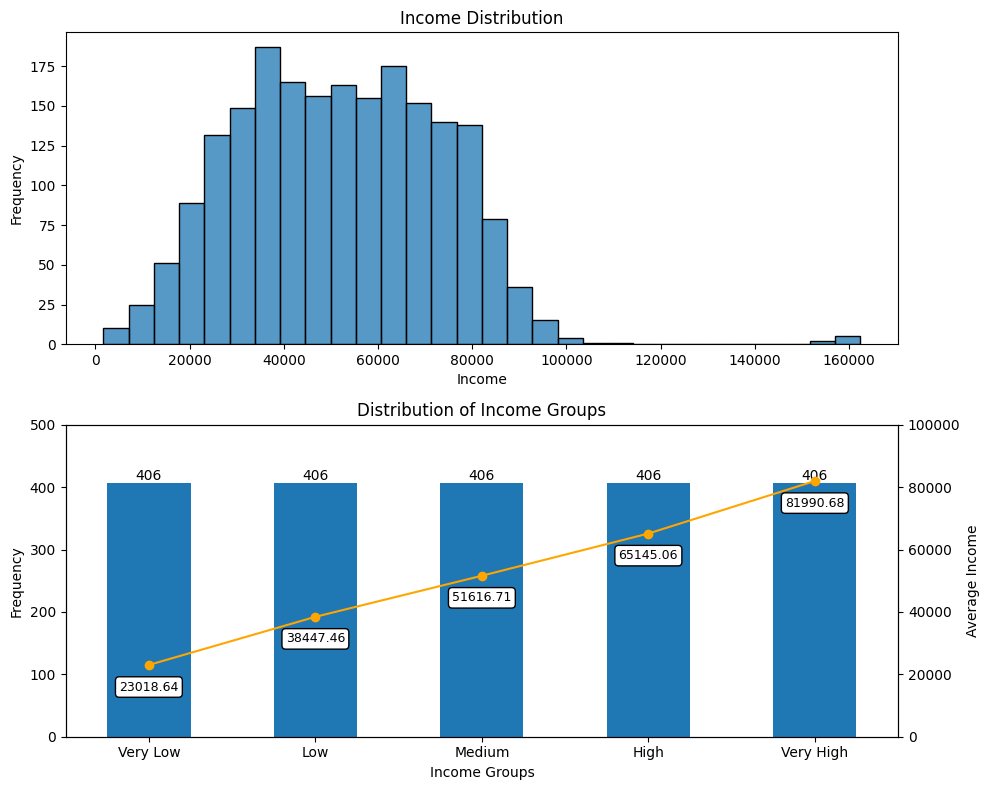

In [20]:
# Data preparation
inc_deciles_counts = df['inc_deciles'].value_counts().sort_index()
avg_income_by_decile = df.groupby('inc_deciles')['Income'].mean().sort_index()

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# First subplot: Income Distribution as a histogram
ax1 = sns.histplot(
    data=df,
    x="Income",
    bins=30,
    kde=False,
    ax=axes[0],
)
ax1.set_title("Income Distribution")
ax1.set_ylabel("Frequency")
ax1.grid(False)

# Second subplot: Distribution of Income Groups with Average Income
ax2 = inc_deciles_counts.plot(kind='bar', ax=axes[1], label='Frequency')
ax2.set_title('Distribution of Income Groups')
ax2.set_xlabel('Income Groups')
ax2.set_ylabel('Frequency')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.set_ylim(0, 500)  # Set the range for ax2
ax2.grid(False)

# Create secondary y-axis
ax3 = ax2.twinx()
ax3.plot(avg_income_by_decile.index, avg_income_by_decile.values, color='orange', marker='o', label='Average Income')
ax3.set_ylabel('Average Income')
ax3.set_ylim(0, 100000)  # Set the range for ax3

# Add labels to the bars
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d')

# Add labels to the line points and position them lower
for i in range(len(avg_income_by_decile)):
    ax3.text(i, avg_income_by_decile.values[i] - 5000, f'{avg_income_by_decile.values[i]:.2f}',  # Adjust position lower
             color='black', ha='center', va='top', 
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'), 
             fontsize=9)

plt.tight_layout()
plt.show()

Customer onboarding by feature 'Dt_Customer'

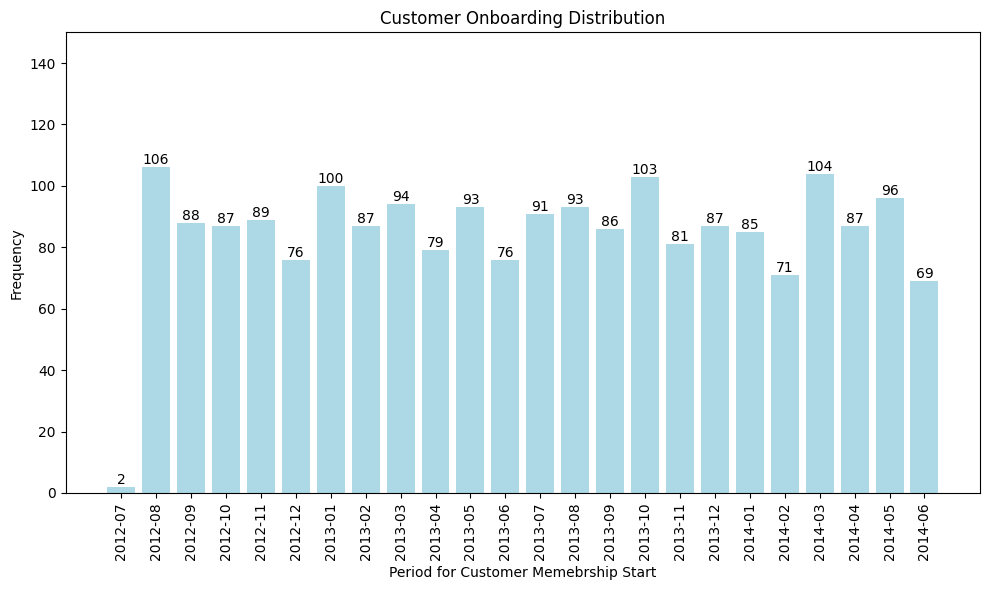

In [24]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y')     # proper format to datevalues if already done
df['year_customer'] = df['Dt_Customer'].dt.year
df['year_month'] = df['Dt_Customer'].dt.strftime('%Y-%m')

# Prepare data
y_m_customer_counts = df['year_month'].value_counts().sort_index()

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(y_m_customer_counts.index, y_m_customer_counts.values, color='lightblue')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
    ax.set_title('Customer Onboarding Distribution')
ax.set_xlabel('Period for Customer Memebrship Start')
ax.set_ylabel('Frequency')
ax.set_xticks(y_m_customer_counts.index) 
ax.set_xticklabels(y_m_customer_counts.index, rotation=90)  
ax.set_ylim(0, 150)  # Set the range for ax
ax.grid(False)

plt.tight_layout()
plt.show()

In [25]:
df["Dt_Customer"].agg(["min", "max"])

min   2012-07-30
max   2014-06-29
Name: Dt_Customer, dtype: datetime64[ns]

Customers' Distribution by feature 'Year_Birth'

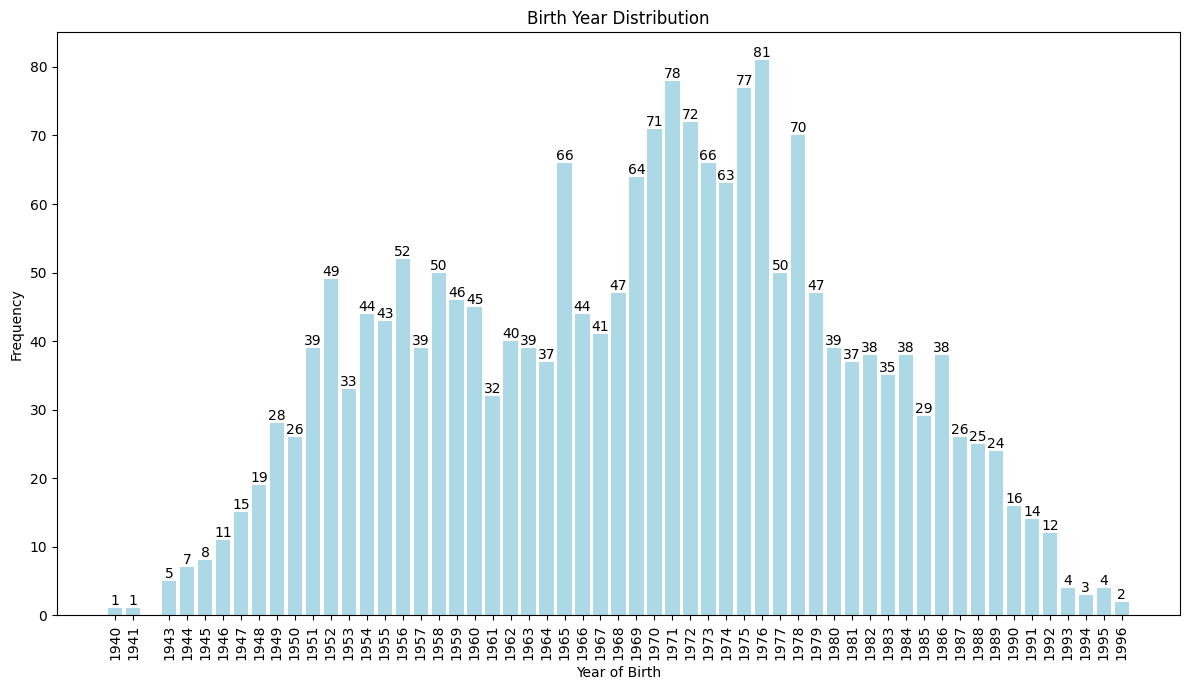

In [26]:
# Prepare data
year_birth_counts = df['Year_Birth'].value_counts().sort_index()

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(year_birth_counts.index, year_birth_counts.values, color='lightblue')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
    ax.set_title('Birth Year Distribution')
ax.set_xlabel('Year of Birth')
ax.set_ylabel('Frequency')
ax.set_xticks(year_birth_counts.index)  # Ensure all ticks are shown
ax.set_xticklabels(year_birth_counts.index, rotation=90)  # Rotate for better readability
ax.grid(False)

plt.tight_layout()
plt.show()

Now, all customers have birth years between 1940 and 1996, making them aged 18 to 74 in 2014.

Customer expenses to prduct groups and feature 'all_expenses'

In [27]:
# Creating list 'products' and feature 'all_expenses'
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['all_expenses'] = df[products].sum(axis=1)

In [28]:
#Customer Income by Education levels
# Education level counts and re-grouping
edu_levels = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']

# Original education level counts and means
income_by_education_count = df.groupby('Education')['ID'].count()
income_by_education_mean = df.groupby('Education')['Income'].mean()

# Grouped education level counts and means
df['edu_level'] = df['Education'].apply(lambda e: 'Basic' if e in ["Basic"] else 'NOT Basic')
income_by_edu_level_count = df.groupby('edu_level')['ID'].count()
income_by_edu_level_mean = df.groupby('edu_level')['Income'].mean()

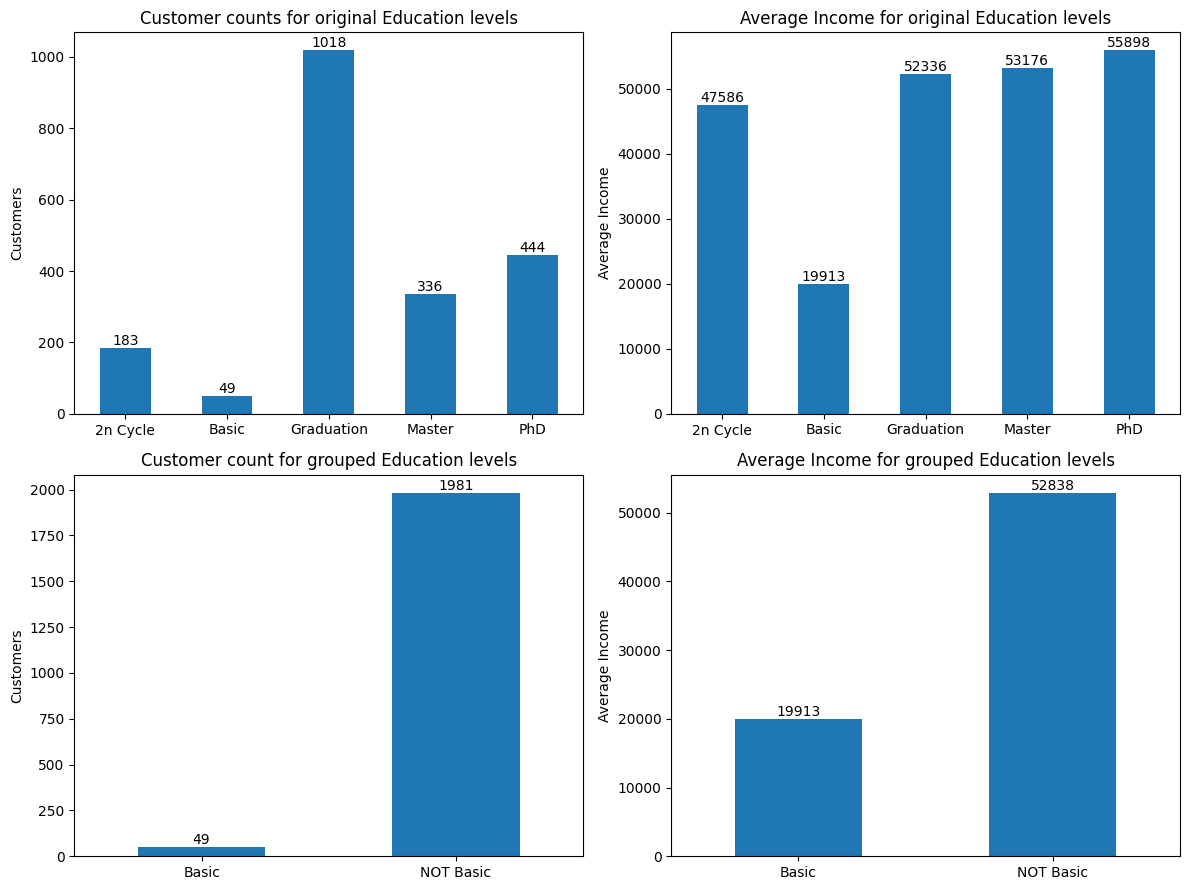

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(12, 9))

# First subplot: Original education level counts
ax1 = income_by_education_count.plot(kind='bar', ax=axes[0, 0])
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d')
ax1.set_title('Customer counts for original Education levels')
ax1.set_xlabel('') # ax1.set_xlabel('Education Group (original)')
ax1.set_ylabel('Customers')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.grid(False)
# Second subplot: Original education level income means
ax2 = income_by_education_mean.plot(kind='bar', ax=axes[0, 1])
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d')
ax2.set_title('Average Income for original Education levels')
ax2.set_xlabel('') # ax2.set_xlabel('Education Group (original)')
ax2.set_ylabel('Average Income')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.grid(False)
# Third subplot: Grouped education level counts
ax3 = income_by_edu_level_count.plot(kind='bar', ax=axes[1, 0])
for container in ax3.containers:
    ax3.bar_label(container, fmt='%d')
ax3.set_title('Customer count for grouped Education levels')
ax3.set_xlabel('') # ax3.set_xlabel('Education level (grouped)')
ax3.set_ylabel('Customers')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0)
ax3.grid(False)
# Fourth subplot: Grouped education level income means
ax4 = income_by_edu_level_mean.plot(kind='bar', ax=axes[1, 1])
for container in ax4.containers:
    ax4.bar_label(container, fmt='%d')
ax4.set_title('Average Income for grouped Education levels')
ax4.set_xlabel('') # ax4.set_xlabel('Education level (grouped)')
ax4.set_ylabel('Average Income')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=0)
ax4.grid(False)

plt.tight_layout()
plt.show()

Customer Income by Marital Status

In [31]:
df['single_partnered'] = df['Marital_Status'].apply(lambda x: 'single' if x in ['Absurd', 'Alone', 'Single', 'Divorced', 'YOLO'] else 'partnered')

# Marital status counts and means
income_by_marital_status_count = df.groupby('Marital_Status')['ID'].count()
income_by_marital_status_mean = df.groupby('Marital_Status')['Income'].mean()
income_by_single_partnered_count = df.groupby('single_partnered')['ID'].count()
income_by_single_partnered_mean = df.groupby('single_partnered')['Income'].mean()

# Expenses by marital status counts and means
spending_by_marital_status = df.groupby('Marital_Status')['all_expenses'].mean()
spending_by_single_partnered = df.groupby('single_partnered')['all_expenses'].mean()

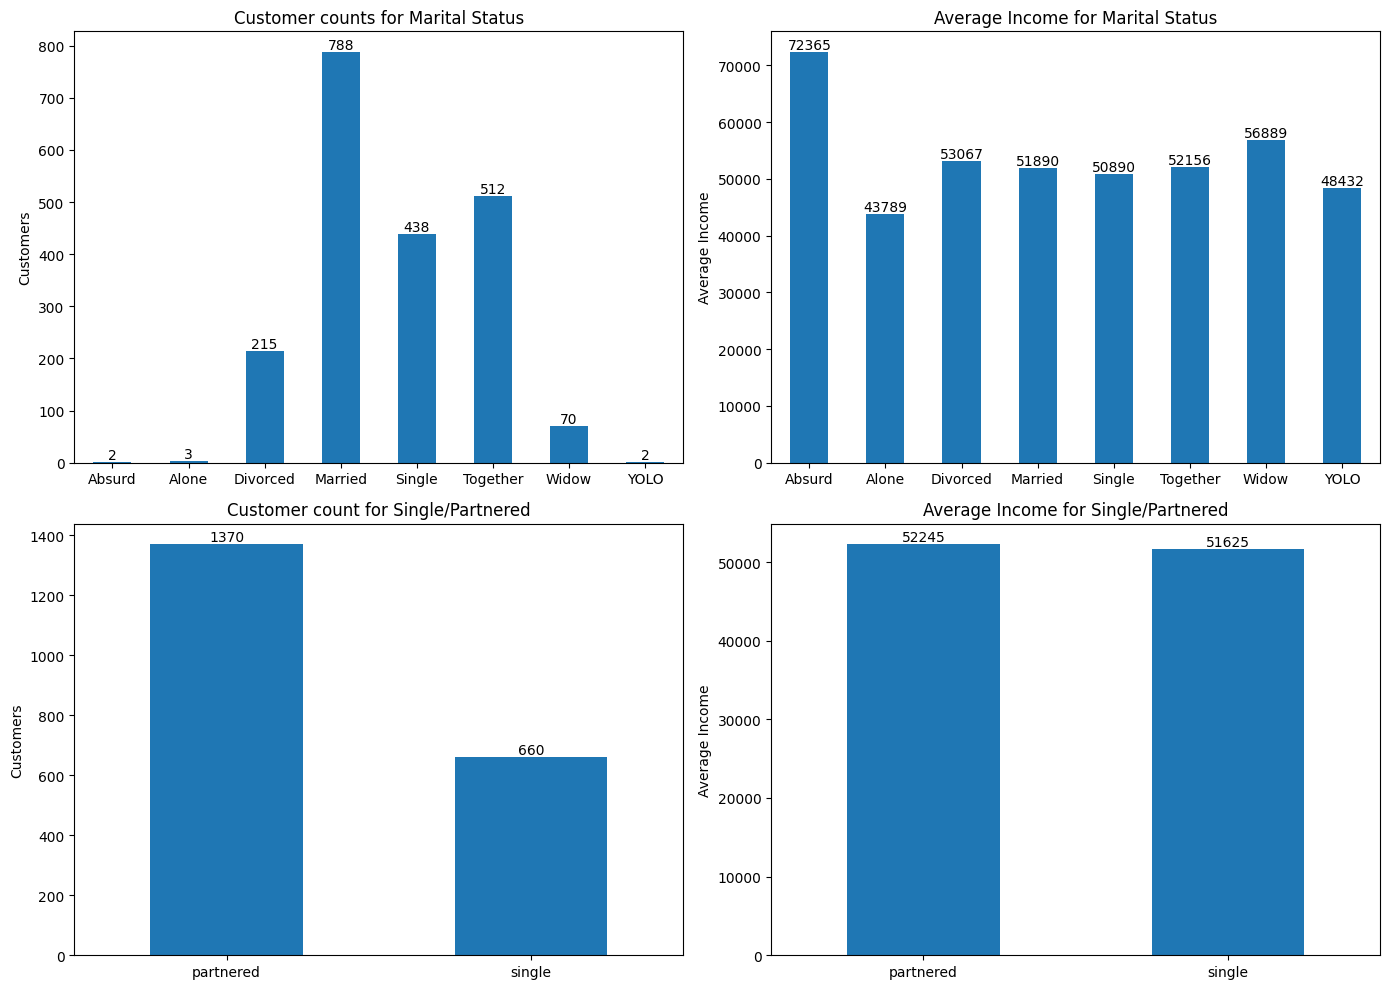

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# First subplot: Marital status counts
ax1 = income_by_marital_status_count.plot(kind='bar', ax=axes[0, 0])
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d')
ax1.set_title('Customer counts for Marital Status')
ax1.set_xlabel('')
ax1.set_ylabel('Customers')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.grid(False)
# Second subplot: Marital status income means
ax2 = income_by_marital_status_mean.plot(kind='bar', ax=axes[0, 1])
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d')
ax2.set_title('Average Income for Marital Status')
ax2.set_xlabel('')
ax2.set_ylabel('Average Income')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.grid(False)
# Third subplot: Single/Partnered counts
ax3 = income_by_single_partnered_count.plot(kind='bar', ax=axes[1, 0])
for container in ax3.containers:
    ax3.bar_label(container, fmt='%d')
ax3.set_title('Customer count for Single/Partnered')
ax3.set_xlabel('')
ax3.set_ylabel('Customers')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0)
ax3.grid(False)
# Fourth subplot: Single/Partnered income means
ax4 = income_by_single_partnered_mean.plot(kind='bar', ax=axes[1, 1])
for container in ax4.containers:
    ax4.bar_label(container, fmt='%d')
ax4.set_title('Average Income for Single/Partnered')
ax4.set_xlabel('')
ax4.set_ylabel('Average Income')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=0)
ax4.grid(False)

plt.tight_layout()
plt.show()

New features 'num_children' and 'is_parent'

In [34]:
# build new feature 'num_children' 
cols = ['Kidhome', 'Teenhome']
df['num_children'] = df[cols].sum(axis=1)

# Create 'is_parent' feature
df["is_parent"] = (df['num_children'] > 0).astype(int)

# Prepare data
income_by_is_parent_count = df.groupby('is_parent')['ID'].count()
income_by_is_parent_mean = df.groupby('is_parent')['Income'].mean()
spending_by_is_parent = df.groupby('is_parent')['all_expenses'].mean()

Customers with Children (or not)

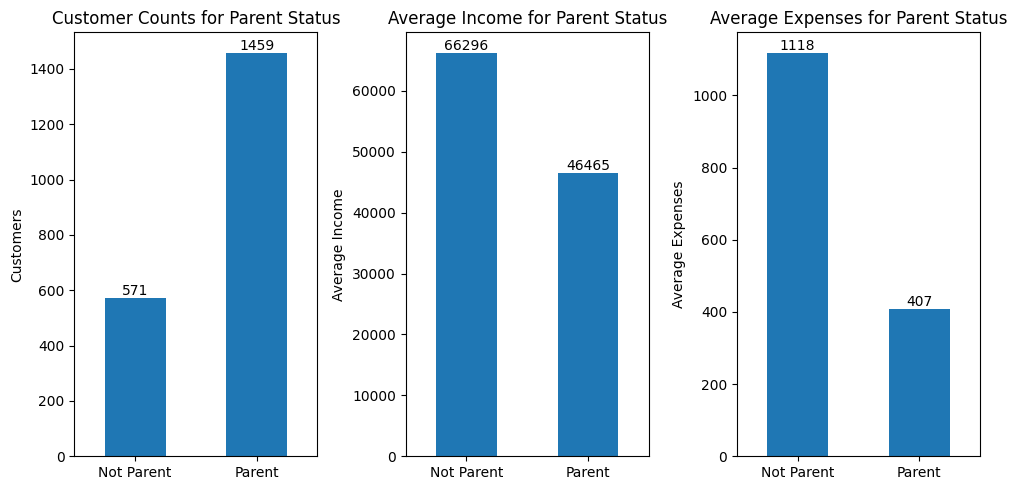

In [35]:
# Create a figure with 3x2 subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# First subplot: Income by is_parent count
ax1 = income_by_is_parent_count.plot(kind='bar', ax=axes[0])
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d')
ax1.set_title('Customer Counts for Parent Status')
ax1.set_ylabel('Customers')
ax1.set_xlabel('')
ax1.set_xticklabels(['Not Parent', 'Parent'], rotation=0)
# Second subplot: Income by is_parent mean
ax2 = income_by_is_parent_mean.plot(kind='bar', ax=axes[1])
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d')
ax2.set_title('Average Income for Parent Status')
ax2.set_ylabel('Average Income')
ax2.set_xlabel('')
ax2.set_xticklabels(['Not Parent', 'Parent'], rotation=0)
# Third subplot: Spending by is_parent
ax3 = spending_by_is_parent.plot(kind='bar', ax=axes[2])
for container in ax3.containers:
    ax3.bar_label(container, fmt='%d')
ax3.set_title('Average Expenses for Parent Status')
ax3.set_ylabel('Average Expenses')
ax3.set_xlabel('')
ax3.set_xticklabels(['Not Parent', 'Parent'], rotation=0)

plt.tight_layout()
plt.show()


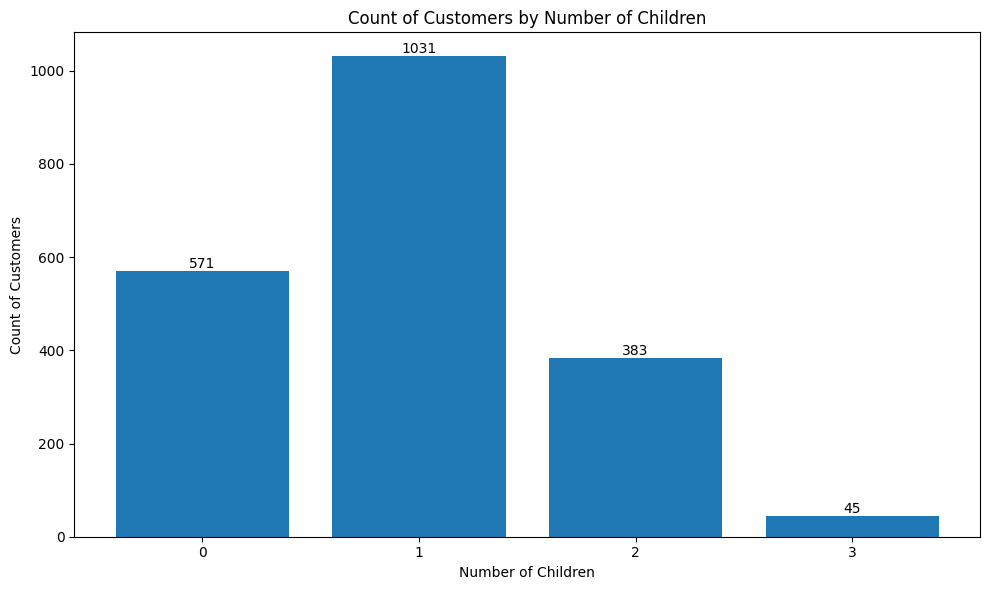

In [36]:
# Prepare data
num_children_counts = df['num_children'].value_counts().sort_index()

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(num_children_counts.index, num_children_counts.values)

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

ax.set_title('Count of Customers by Number of Children')
ax.set_xlabel('Number of Children')
ax.set_ylabel('Count of Customers')
ax.set_xticks(num_children_counts.index)  # Ensure all ticks are shown
ax.set_xticklabels(num_children_counts.index, rotation=0)
plt.tight_layout()
plt.show()    


Responses to Campaigns

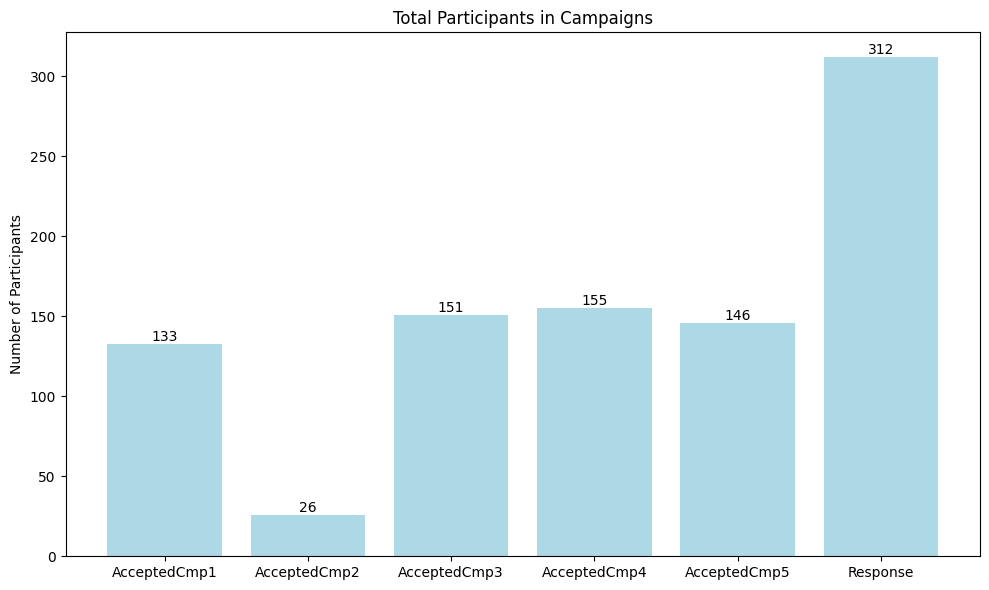

In [37]:
# Response to the Campaigns 

cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df['num_promotions'] = df[cols].sum(axis=1)

cmp_participants = {}
for col in cols :
    cmp_participants[col] = df[col].sum()

# Create the bar chart

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(cmp_participants.keys(), cmp_participants.values(), color='lightblue')
# Add labels to the bars
ax.bar_label(ax.containers[0], fmt='%d')

plt.title('Total Participants in Campaigns')
plt.xlabel('')
plt.ylabel('Number of Participants')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

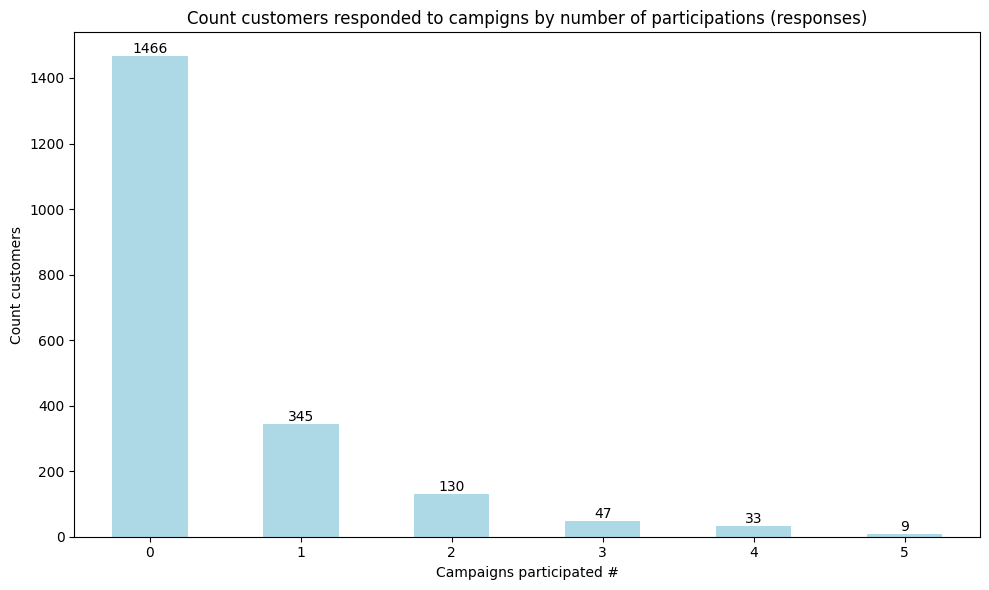

In [39]:
# Split of Customers by participation in Promotions
spending_by_cmp = df.groupby('num_promotions')['ID'].count()

ax = spending_by_cmp.plot(kind='bar', figsize=(10, 6), color='lightblue')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
    
plt.title('Count customers responded to campigns by number of participations (responses)')
plt.xlabel('Campaigns participated #')
ax.set_xticklabels(spending_by_cmp.index, rotation=0) 
plt.ylabel('Count customers')
plt.tight_layout()
plt.show()

Views about Income vs Expenses (by Product Groups)

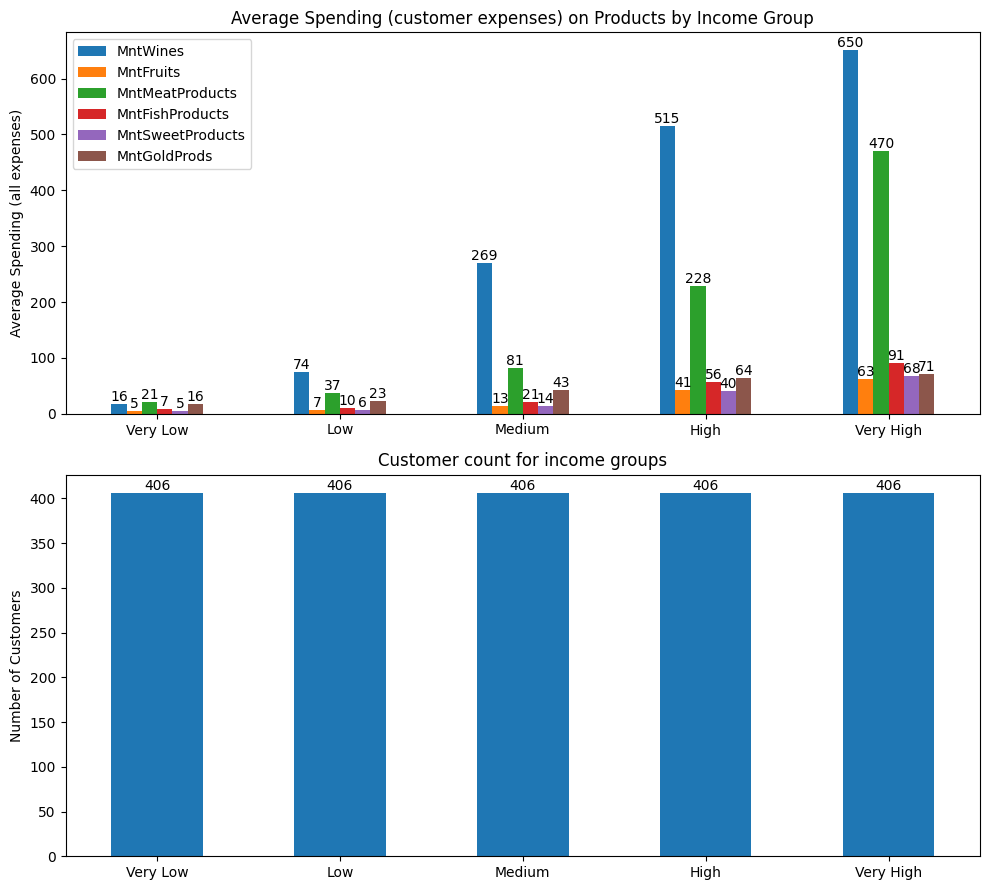

In [41]:
# Data preparation for expense deciles
spending_by_inc = df.groupby('inc_deciles')[products].mean()
spending_by_inc_count = df.groupby('inc_deciles')['ID'].count()

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 9))

# First subplot: Average Spending on Products by Income Group
ax1 = spending_by_inc.plot(kind='bar', ax=axes[0])
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d')
ax1.set_title('Average Spending (customer expenses) on Products by Income Group')
ax1.set_xlabel('')
ax1.set_ylabel('Average Spending (all expenses)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.grid(False)

# Second subplot: Customer count
ax2 = spending_by_inc_count.plot(kind='bar', ax=axes[1])
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d')
ax2.set_title('Customer count for income groups')
ax2.set_xlabel('')
ax2.set_ylabel('Number of Customers')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.grid(False)

plt.tight_layout()
plt.show()

Views about Income vs Expenses (by Place / Channel)

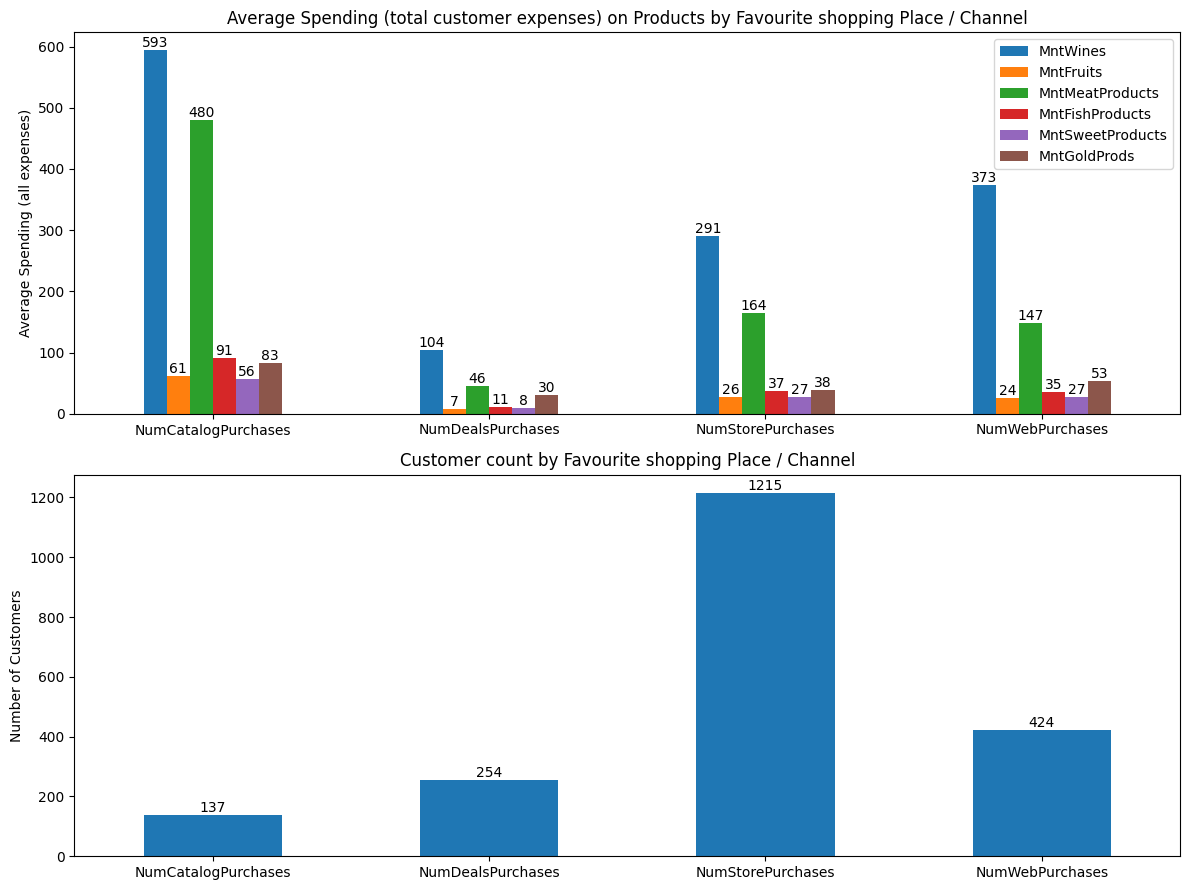

In [44]:
# calclulate 'num_purchases' and feature 'favourite_place'
purchase_places = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df['num_purchases'] = df[purchase_places].sum(axis=1)
df['favourite_place'] = df[purchase_places].idxmax(axis=1)

# Data preparation
spending_by_place = df.groupby('favourite_place')[products].mean()
spending_by_place_count = df.groupby('favourite_place')['ID'].count()

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 9))

# First subplot: Average Spending on Products by Favourite Place/Channel
ax1 = spending_by_place.plot(kind='bar', ax=axes[0])
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d')
ax1.set_title('Average Spending (total customer expenses) on Products by Favourite shopping Place / Channel')
ax1.set_xlabel('')
ax1.set_ylabel('Average Spending (all expenses)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.grid(False)
# Second subplot: Customer count by Favourite Place/Channel
ax2 = spending_by_place_count.plot(kind='bar', ax=axes[1])
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d')
ax2.set_title('Customer count by Favourite shopping Place / Channel')
ax2.set_xlabel('')
ax2.set_ylabel('Number of Customers')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.grid(False)

plt.tight_layout()
plt.show()

Views about Income vs Expenses (by Favourite Product Group)

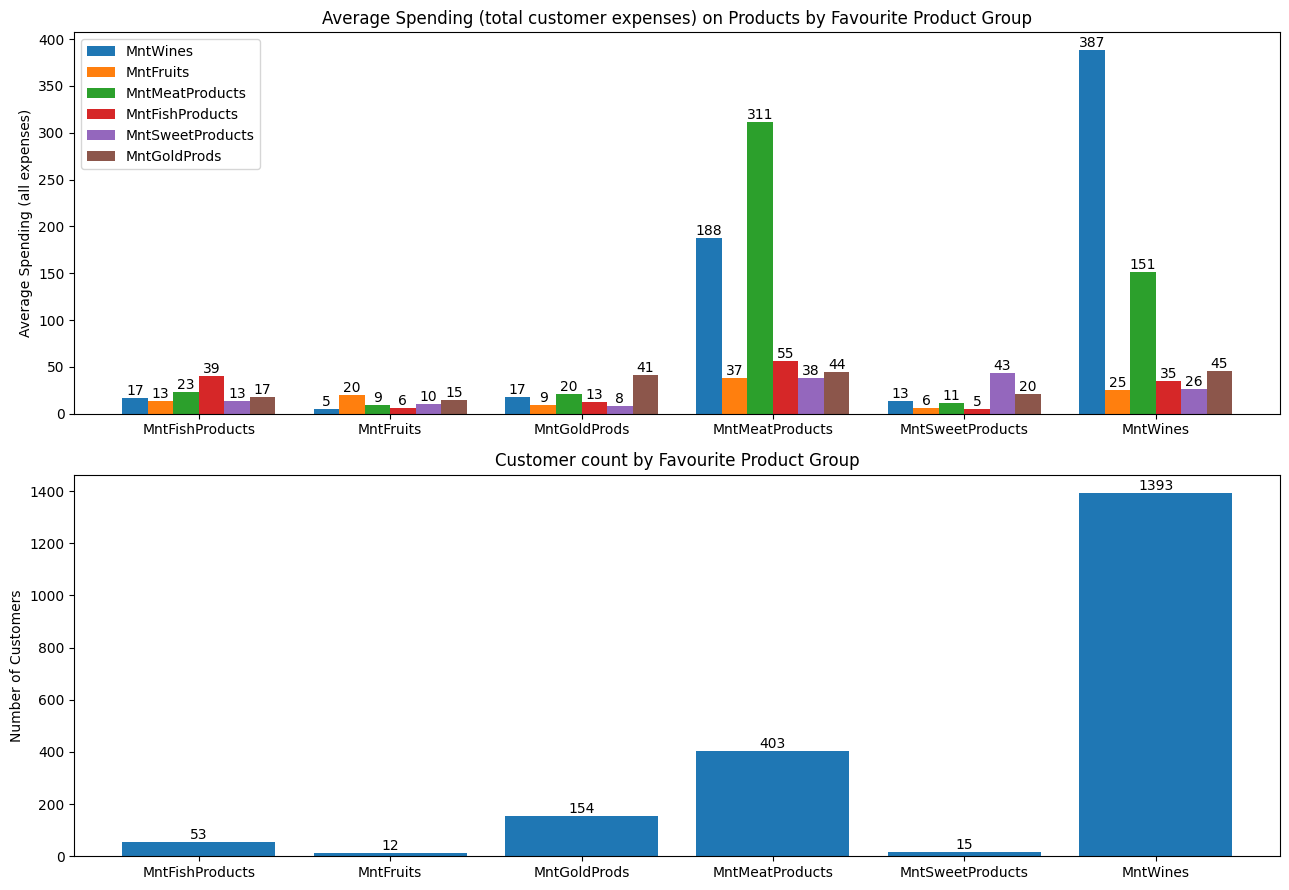

In [45]:
# calclulate 'num_purchases' and feature 'favourite_prod_grp'
df['favourite_prod_grp'] = df[products].idxmax(axis=1)

# Data preparation
spending_by_inc = df.groupby('favourite_prod_grp')[products].mean()
spending_by_inc_count = df.groupby('favourite_prod_grp')['ID'].count()

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(13, 9))

# First subplot: Average Spending on Products by Favourite Product Group
ax1 = spending_by_inc.plot(kind='bar', ax=axes[0], width=0.8)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d')
ax1.set_title('Average Spending (total customer expenses) on Products by Favourite Product Group')
ax1.set_xlabel('')
ax1.set_ylabel('Average Spending (all expenses)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.grid(False)

# Second subplot: Customer count by Favourite Product Group
ax2 = spending_by_inc_count.plot(kind='bar', ax=axes[1], width=0.8)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d')
ax2.set_title('Customer count by Favourite Product Group')
ax2.set_xlabel('')
ax2.set_ylabel('Number of Customers')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.grid(False)

plt.tight_layout()
plt.show()

In [46]:
# reducing dimensions for modelling
df.drop(columns=['ID', 'Marital_Status', 'Kidhome', 'Teenhome', 'Complain'],inplace=True)

# campaigns
df.drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'],inplace=True)

# dropping also some created features
df.drop(columns=['year_month'],inplace=True)  

Checking categorical features remaining in dataset

In [47]:
categorical = df.describe(include=['object'])
print("\nDESCRIBE (categorical objects):\n", categorical.T)     

for col in categorical:
    unique_labels = df[col].unique()
    print(f"\n'{col}' labels: {unique_labels}")


DESCRIBE (categorical objects):
                    count unique                top  freq
Education           2030      5         Graduation  1018
edu_level           2030      2          NOT Basic  1981
single_partnered    2030      2          partnered  1370
favourite_place     2030      4  NumStorePurchases  1215
favourite_prod_grp  2030      6           MntWines  1393

'Education' labels: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']

'edu_level' labels: ['NOT Basic' 'Basic']

'single_partnered' labels: ['single' 'partnered']

'favourite_place' labels: ['NumCatalogPurchases' 'NumDealsPurchases' 'NumStorePurchases'
 'NumWebPurchases']

'favourite_prod_grp' labels: ['MntWines' 'MntMeatProducts' 'MntFruits' 'MntFishProducts' 'MntGoldProds'
 'MntSweetProducts']


Apply 'LabelEncoder()' to categorical features

In [56]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [57]:

plt.style.use("fivethirtyeight")

plt.rcParams.update(
    {
        "axes.facecolor": "#FFF9ED",
        "figure.figsize": (6, 4),
        "figure.facecolor": "w",
        "axes.titlesize": 12,
        "legend.frameon": True,
        "legend.facecolor": "inherit",
        "lines.linewidth": 1.2,
        "font.size": 10.0,
        "axes.grid": False
    }
)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, normalize
from sklearn.metrics import silhouette_score
from sklearn import cluster
from sklearn.cluster import AgglomerativeClustering, KMeans

from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import manifold
from sklearn import decomposition
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import plotly.express as px
import re

custom_palette = ['#6495ED', '#FFB6C1', '#FFD700', '#32CD32', '#DAA520'] 
sns.set_palette(custom_palette)

In [59]:
# change categorical data to numerical with 'LabelEncoder()' (or apply 'pd.get_dummies' or 'OneHotEncoder' to create larger set of binary features)
categorical_cols = ['Dt_Customer', 'Education', 'edu_level', 'single_partnered', 'favourite_prod_grp', 'favourite_place', 'inc_deciles']  
encoder = LabelEncoder()

print("HEAD (full list of dataset features):\n",df.head(2).T)

# 'numerical_df' as new base for pre-processing
numerical_df = df   
numerical_df[categorical_cols] = df[categorical_cols].apply(lambda col: encoder.fit_transform(col))

print("\nHEAD (dataset with encoded categories):\n",numerical_df.head(2).T)
print("\n",numerical_df.shape)

HEAD (full list of dataset features):
                                        0                    1
Year_Birth                          1957                 1954
Education                     Graduation           Graduation
Income                             58138                46344
Dt_Customer          2012-09-04 00:00:00  2014-03-08 00:00:00
Recency                               58                   38
MntWines                             635                   11
MntFruits                             88                    1
MntMeatProducts                      546                    6
MntFishProducts                      172                    2
MntSweetProducts                      88                    1
MntGoldProds                          88                    6
NumDealsPurchases                      3                    2
NumWebPurchases                        8                    1
NumCatalogPurchases                   10                    1
NumStorePurchases              

Correlation Matrix

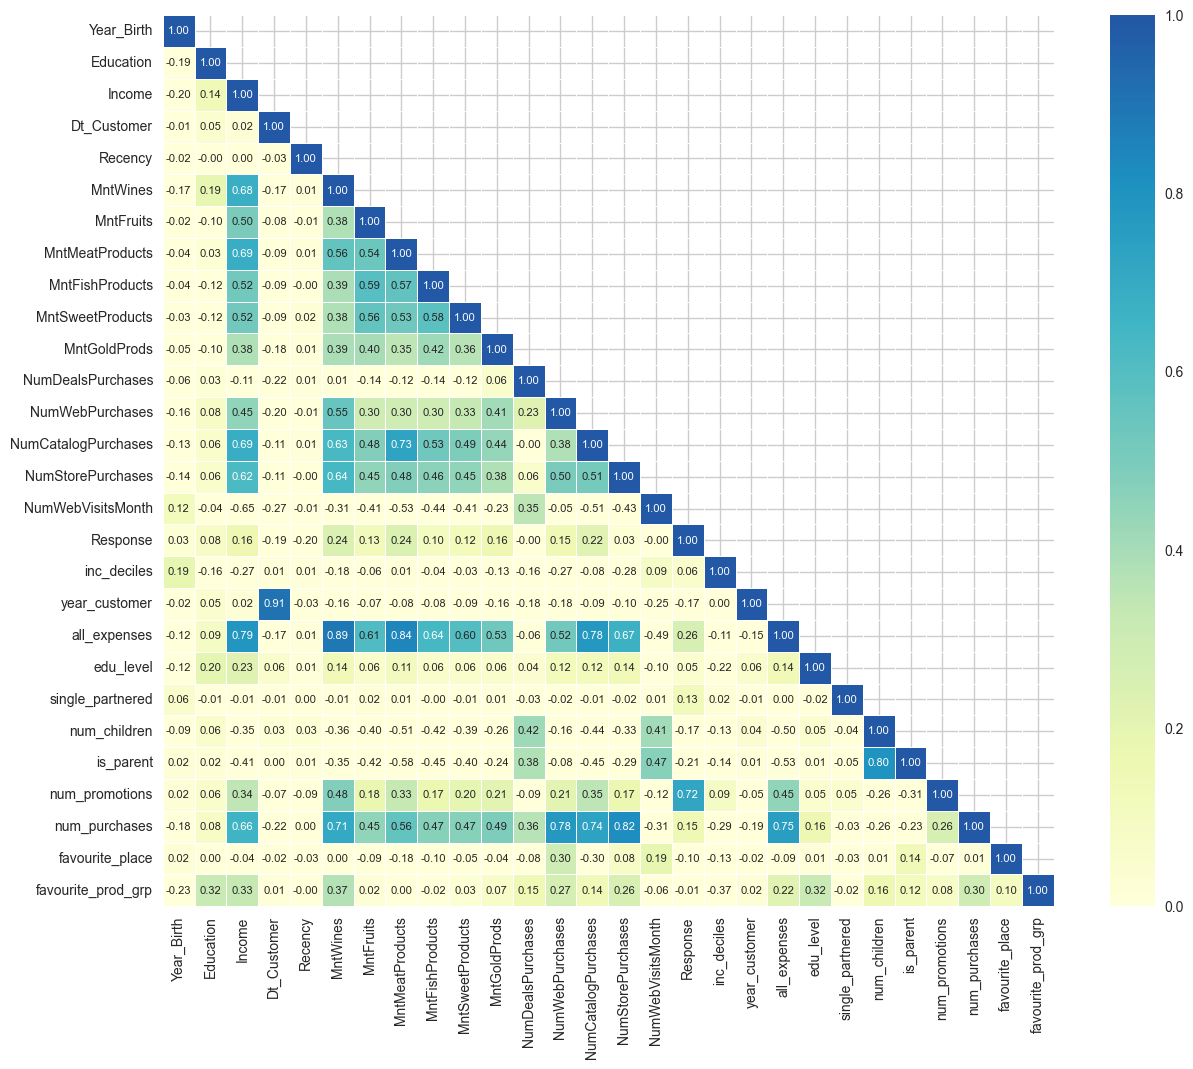

In [60]:
# creating correlation matrix
corr_mat = numerical_df.corr().round(2)

#Creating a Mask for the Heatmap
mymask = np.zeros_like(corr_mat)
mymask[np.triu_indices_from(mymask, k=1)] = True

# Configuring the Heatmap Visualization
plt.figure(figsize=(13,11))
sns.heatmap(corr_mat, cmap='YlGnBu', vmin=0, vmax=1, annot=True, annot_kws={"size": 8}, fmt='.2f', square=True, linewidths=.5, mask=mymask, center=0.65)
sns.set(font_scale=0.7)
plt.show()

In [61]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2030 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year_Birth           2030 non-null   int64
 1   Education            2030 non-null   int64
 2   Income               2030 non-null   int64
 3   Dt_Customer          2030 non-null   int64
 4   Recency              2030 non-null   int64
 5   MntWines             2030 non-null   int64
 6   MntFruits            2030 non-null   int64
 7   MntMeatProducts      2030 non-null   int64
 8   MntFishProducts      2030 non-null   int64
 9   MntSweetProducts     2030 non-null   int64
 10  MntGoldProds         2030 non-null   int64
 11  NumDealsPurchases    2030 non-null   int64
 12  NumWebPurchases      2030 non-null   int64
 13  NumCatalogPurchases  2030 non-null   int64
 14  NumStorePurchases    2030 non-null   int64
 15  NumWebVisitsMonth    2030 non-null   int64
 16  Response             2030 non

Apply 'StandardScaler()'

In [62]:
# Standardize the dataset features
scaler = StandardScaler()

X = scaler.fit_transform(numerical_df)
df_scaled = X.copy()

In [63]:
#Dimensionality Reduction with PCA

In [64]:
pca = decomposition.PCA(0.9)
pca.fit(X)

x_pca = pd.DataFrame(pca.transform(X), columns=[f"PC{i}" for i in range(2, pca.n_components_ + 2)])

print("Number of Components:", pca.n_components_)
print("Explained Variance Ratio Sum:", pca.explained_variance_ratio_.sum())

# Get the loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f"PC{i}" for i in range(1, pca.n_components_ + 1)], index = numerical_df.columns)
loadings = loadings.round(3)

print("PCA Loadings:")
print(loadings)

Number of Components: 16
Explained Variance Ratio Sum: 0.9054462012497608
PCA Loadings:
                       PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8  \
Year_Birth          -0.053 -0.162 -0.188 -0.043  0.147 -0.240  0.175  0.090   
Education            0.023  0.164  0.201  0.325 -0.074  0.378 -0.019  0.098   
Income               0.291  0.034  0.179  0.038 -0.021  0.043  0.010 -0.027   
Dt_Customer         -0.053 -0.205  0.510  0.083  0.063 -0.343 -0.006  0.157   
Recency             -0.002  0.013  0.032 -0.216 -0.192  0.282  0.332  0.653   
MntWines             0.277  0.143  0.004  0.145  0.051  0.069 -0.038  0.218   
MntFruits            0.233 -0.107 -0.025 -0.173  0.010 -0.079  0.057 -0.209   
MntMeatProducts      0.281 -0.128 -0.023  0.011 -0.137  0.035 -0.014  0.041   
MntFishProducts      0.240 -0.122 -0.032 -0.203 -0.019 -0.065  0.018 -0.184   
MntSweetProducts     0.232 -0.095 -0.034 -0.182  0.030 -0.071  0.030 -0.125   
MntGoldProds         0.196  0.057 -0.108 -0

PCA Results

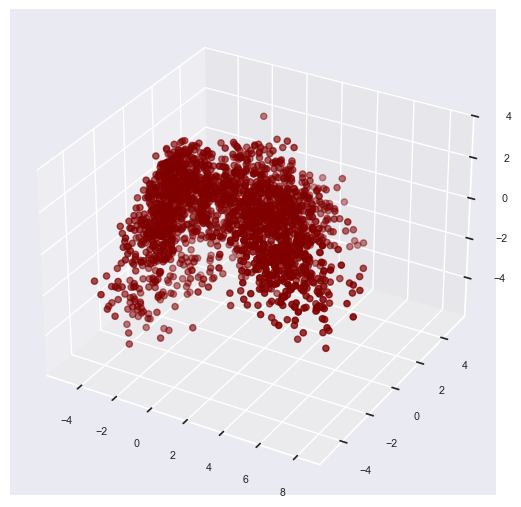

In [65]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    xs=x_pca.iloc[:, 0],
    ys=x_pca.iloc[:, 1],
    zs=x_pca.iloc[:, 2],
    c="maroon",
    marker="o",
)
plt.show()

In [66]:
#KMeans Clustering

  File "C:\Users\Dinesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Dinesh\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Dinesh\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Dinesh\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


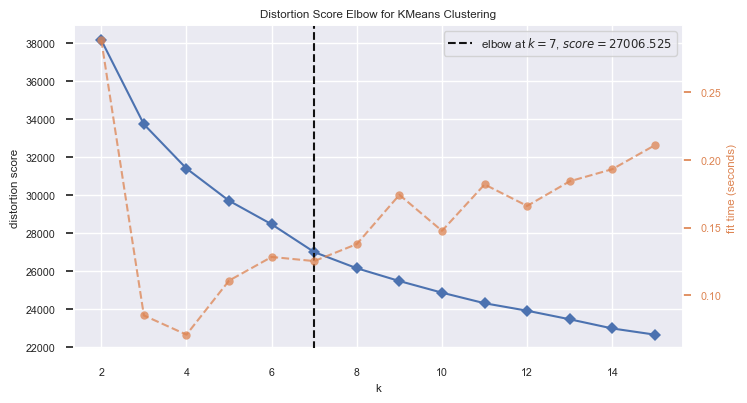

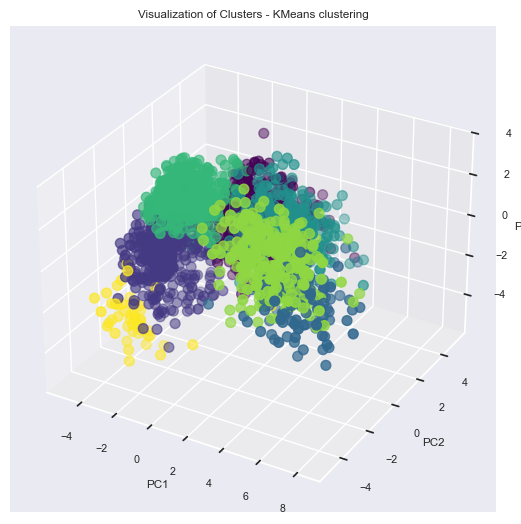

In [67]:
fig, ax = plt.subplots(figsize=(7, 4))
Elbow_M = KElbowVisualizer(cluster.KMeans(n_init=10), k=15, ax=ax)
Elbow_M.fit(x_pca)
Elbow_M.show()
plt.show()

kmeans = cluster.KMeans(n_clusters=Elbow_M.elbow_value_, n_init=10, random_state=42)
kmeans.fit(x_pca)
clusters = kmeans.predict(x_pca) + 1

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    xs=x_pca.iloc[:, 0],
    ys=x_pca.iloc[:, 1],
    zs=x_pca.iloc[:, 2],
     marker="o",
    c=clusters,
    s=50,
    cmap="viridis",
)
ax.set(
    xlabel="PC1",
    ylabel="PC2",
    zlabel="PC3",
    title="Visualization of Clusters - KMeans clustering",
)
plt.show()

kmeans_data = numerical_df.copy()
kmeans_data["cluster"] = kmeans.predict(x_pca) + 1

In [68]:
#Agglomerative Hierarchical Clustering

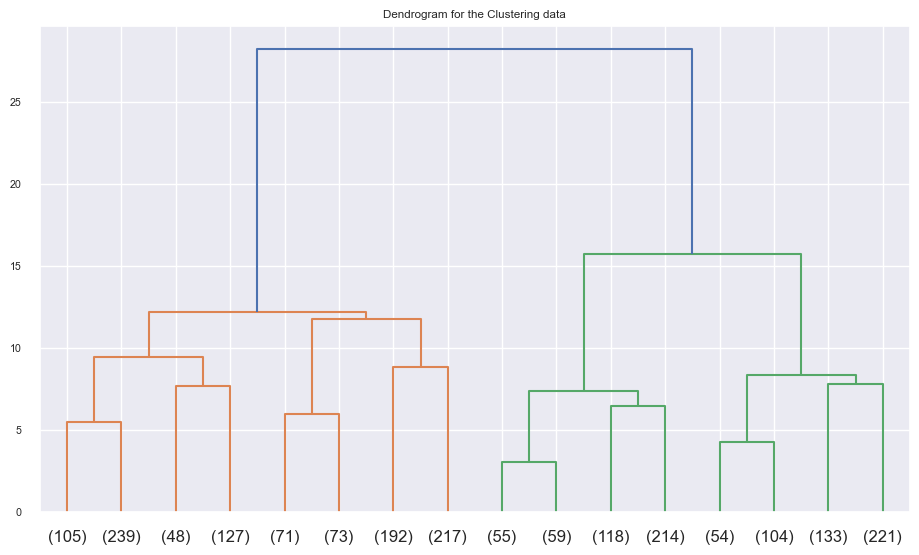

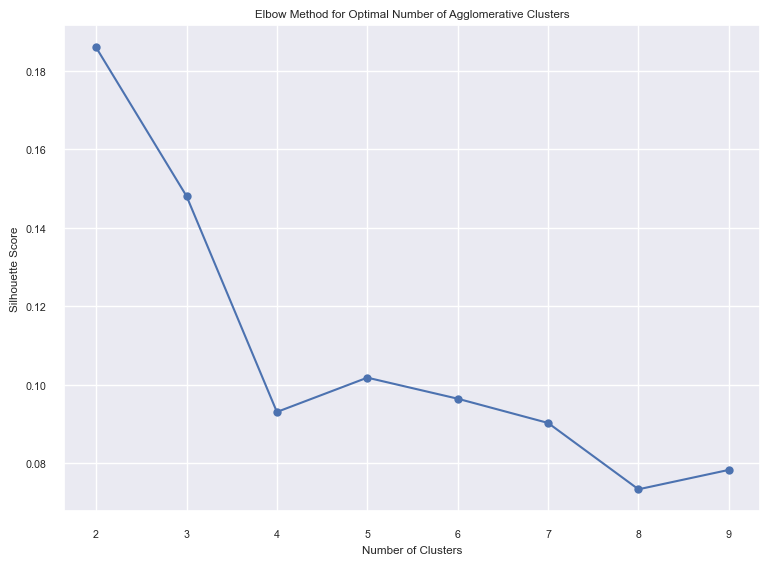


Agglomerate clustering results for: 4 clusters.

Label 0 (Cluster 1): 553 occurrences
Label 1 (Cluster 2): 519 occurrences
Label 2 (Cluster 3): 446 occurrences
Label 3 (Cluster 4): 512 occurrences


In [69]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering 

# Normalizing the Data 
normalized_df = pd.DataFrame(normalize(df_scaled))
  
plt.figure(figsize =(10, 6)) 
plt.title('Dendrogram for the Clustering data') 
    
df_linkage = shc.linkage(normalized_df, method ='ward')
    
shc.dendrogram(df_linkage, truncate_mode='level', p=3)
plt.show()
silhouette_scores = [] 
for n_cluster in range(2, 10) :
    clustering = AgglomerativeClustering(n_clusters = n_cluster)
    labels = clustering.fit_predict(normalized_df)
    silhouette_avg = silhouette_score(normalized_df, labels)
    silhouette_scores.append(silhouette_avg)
        
    # silhouette_scores.append(silhouette_score(X_principal, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal))) 
    
    # Plot the Elbow Curve to compare the results 
plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Elbow Method for Optimal Number of Agglomerative Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Building and Visualizing clustering model
k = 4
agg = AgglomerativeClustering(n_clusters=k)
agg.fit_predict(normalized_df)

print("\nAgglomerate clustering results for:", k, "clusters.\n")

# Count the occurrences of each label
labels, counts = np.unique(agg.labels_, return_counts=True)

# Print the total results for Clusters
for label, count in zip(labels, counts):
    print(f"Label {label} (Cluster {label+1}): {count} occurrences")
    # Add cluster labels to the data
# df = pd.DataFrame(X_principal, columns=X_principal.feature_names)
normalized_df['Cluster'] = agg.labels_

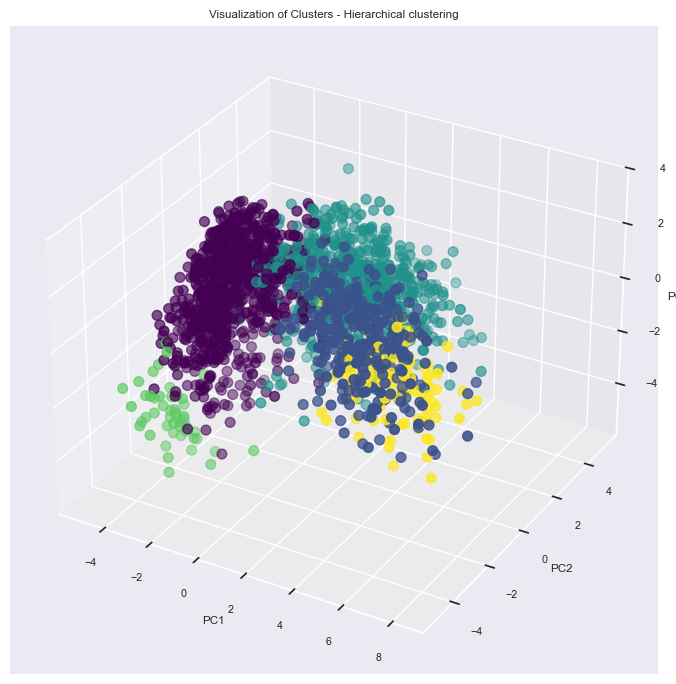

In [70]:
agglo_model = cluster.AgglomerativeClustering(n_clusters=5, linkage="ward")
agglo_model.fit(x_pca)
labels = agglo_model.labels_ + 1


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    xs=x_pca.iloc[:, 0],
    ys=x_pca.iloc[:, 1],
    zs=x_pca.iloc[:, 2],
    marker="o",
    c=labels,
    s=50,
    cmap="viridis",
)
ax.set(
    xlabel="PC1",
    ylabel="PC2",
    zlabel="PC3",
    title="Visualization of Clusters - Hierarchical clustering",
)
plt.show()

In [71]:
#Clustering results

Agglomerative Clustering k-value curve is nice and steep where model provided Elbow = 4 well balanced clusters (with 446 to 553 customers).
KMeans Elbow gives larger k-value and it suggests more clusters (in case of larger k, smaller clusters can be merged afterwards).
Comparing KMeans and Agglomerative Clustering results the Agglomerative Hierarchical Clustering seems easier to use for finalising the task without extra steps.
Therefore, Agglomerative Hierarchical Clustering is easier to use for summarizing customer segments based on their behavioral and demographic features.
Although Agglomerative model presents customer segments as hierarchical structures, describing customer profiles within clusters can be complex.

In [73]:
#Characteristics for Clusters

In [75]:
columns_to_examine = numerical_df.columns

agglo_data = df[columns_to_examine].copy()

agglo_data["Cluster"] = labels
numerical_df['Cluster'] = agg.labels_

#Cluster split by Income groups and Partnership flag

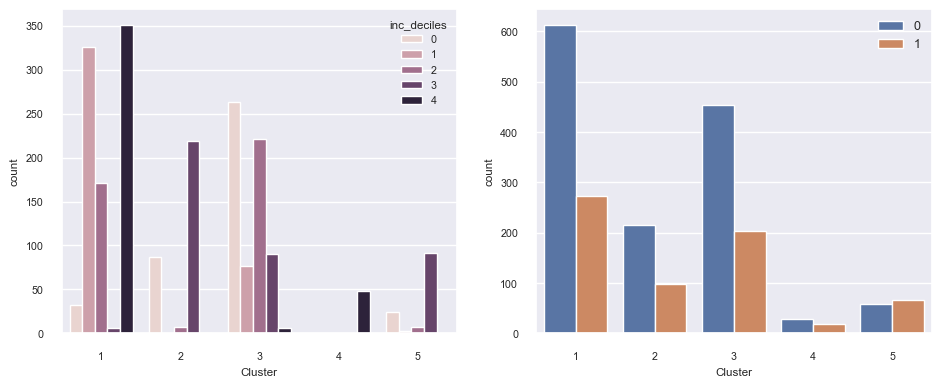

In [76]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

sns.countplot(data=agglo_data, x="Cluster", hue="inc_deciles", ax=ax1)
sns.countplot(data=agglo_data, x="Cluster", hue="single_partnered", ax=ax2)
ax2.legend(fontsize=9)

In [77]:
#Cluster split for All Expenses and Income

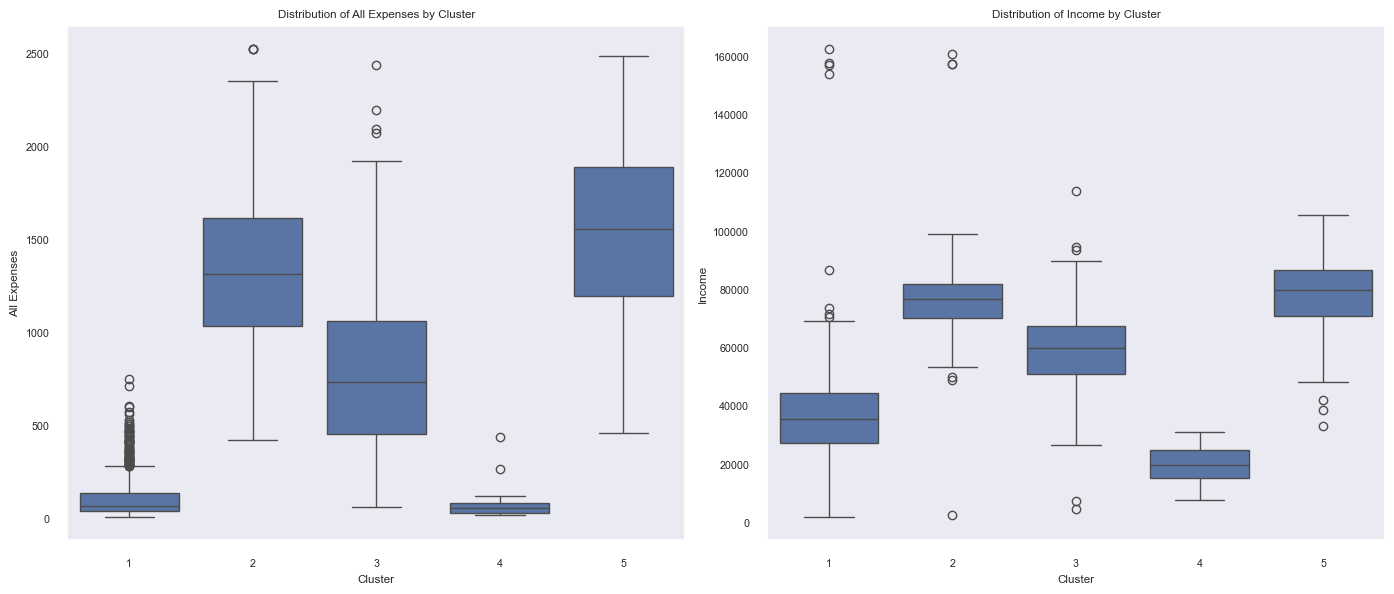

In [79]:
# avg_spending = agglo_data.groupby("Cluster")[["all_expenses"]].mean()
# sns.boxplot(data=agglo_data, x="Cluster", y="all_expenses")

# Create a figure with 1 row and 2 columns for subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First subplot: Distribution of 'all_expenses' by Cluster
sns.boxplot(data=agglo_data, x="Cluster", y="all_expenses", ax=axes[0])
axes[0].set_title('Distribution of All Expenses by Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('All Expenses')
axes[0].grid(False)
# Second subplot: Distribution of 'Income' by Cluster
sns.boxplot(data=agglo_data, x="Cluster", y="Income", ax=axes[1])
axes[1].set_title('Distribution of Income by Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Income')
axes[1].grid(False)

plt.tight_layout()

plt.show()

In [80]:
#Scatterplot for Income vs Spending

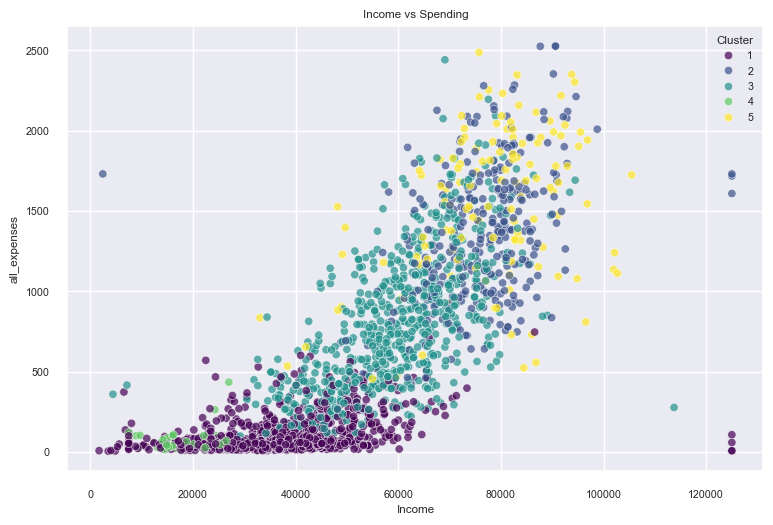

In [81]:
agglo_data["Income"] = agglo_data["Income"].clip(0, 125000)
sns.scatterplot(
    data=agglo_data,
    x="Income",
    y="all_expenses",
    hue="Cluster",
    palette="viridis",
    alpha=0.7,
)
plt.title("Income vs Spending")
plt.show()

In [82]:
#Scatterplot for Number of Purchases vs Spending

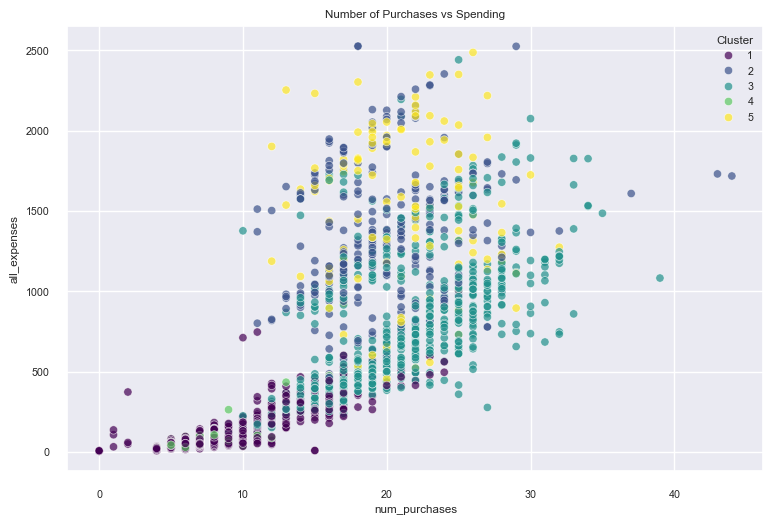

In [83]:
agglo_data["num_purchases"] = agglo_data["num_purchases"].clip(0, 125000)
sns.scatterplot(
    data=agglo_data,
    x="num_purchases",
    y="all_expenses",
    hue="Cluster",
    palette="viridis",
    alpha=0.7,
)
plt.title("Number of Purchases vs Spending")
plt.show()

In [84]:
spending_by_cluster = agglo_data.groupby("Cluster")["all_expenses"].sum()
commodities = "Wines Fruits Meat Fish Sweets Gold".split()
avg_spending_by_commodity = agglo_data.groupby("Cluster")[products].sum()
proportion = avg_spending_by_commodity.T / spending_by_cluster
proportion.style.background_gradient(cmap="viridis", axis=0).set_caption(
    '<span style="color: blue; font-size: 17px;">Proportion of spending on Product Groups</span>'
)

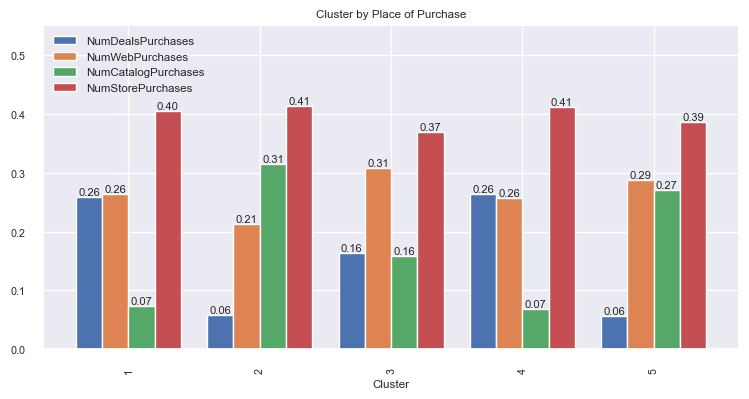

In [85]:
places = (
    "NumDealsPurchases NumWebPurchases NumCatalogPurchases NumStorePurchases".split()
)

by_place_of_purchase = agglo_data.groupby("Cluster")[places].sum()
by_place_of_purchase = by_place_of_purchase.apply(lambda x: x / np.sum(x), axis=1)

ax = plt.axes()
by_place_of_purchase.plot(kind="bar", figsize=(8, 4), ax=ax, width=0.8, ylim=(0, 0.55))
ax.legend(fontsize=8.3, loc=2)
for i in ax.containers:
    plt.bar_label(i, fmt="%.2f", fontsize=8)
ax.set_title("Cluster by Place of Purchase")
plt.show()

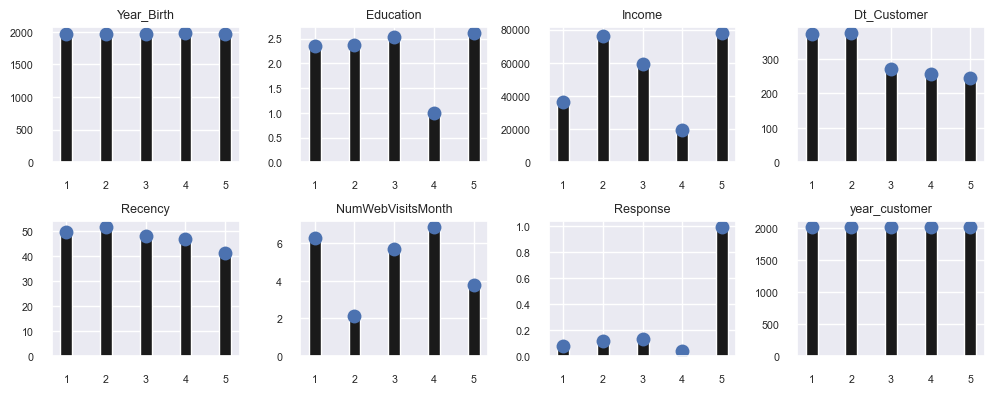

In [86]:
other_num_cols = agglo_data.drop(
    [*products, *places, "inc_deciles", "single_partnered", "Cluster"], axis=1
).columns
fig, axes = plt.subplots(2, 4, figsize=(10, 4))
data = agglo_data.groupby("Cluster")[other_num_cols].mean()
axes = axes.flatten()
for col, ax in zip(other_num_cols, axes):
    data.sort_values(by=col, ascending=False, inplace=True)
    ax.plot(data.index, data[col], marker="o", ls="", ms=10)
    ax.bar(data.index, data[col], width=0.3, color="k")
    ax.set_title(f"{col}", size=9)
plt.tight_layout()

In [87]:
#Means for Clusters

In [88]:
# In agglomerative clustering, centroids can be computed by finding the average position of all points in each cluster. 
# NB ! Averages for categorical encoded features are rather misleading, while binary features effectively show the proportion of 0s and 1s

summary_df = numerical_df.select_dtypes(include=['number'])
cluster_summary = summary_df.groupby('Cluster').mean()
cluster_summary = cluster_summary.round(1)

cluster_summary.T

Cluster                    0        1        2        3
Year_Birth            1967.2   1974.2   1968.4   1965.8
Education                2.8      2.0      2.5      2.3
Income               43614.7  30636.0  76444.0  61593.1
Dt_Customer            337.5    345.7    324.9    306.2
Recency                 45.6     51.9     48.0     50.0
MntWines               134.3     40.1    618.2    486.7
MntFruits                5.6      8.0     63.2     34.9
MntMeatProducts         44.2     29.2    484.2    166.2
MntFishProducts          7.1     12.7     93.0     46.9
MntSweetProducts         5.5      8.6     64.4     37.0
MntGoldProds            22.7     19.9     76.1     62.5
NumDealsPurchases        2.9      1.9      1.2      3.2
NumWebPurchases          3.2      2.3      4.8      6.3
NumCatalogPurchases      1.1      0.5      6.3      3.4
NumStorePurchases        4.0      3.3      8.1      8.3
NumWebVisitsMonth        6.3      6.5      2.7      5.3
Response                 0.3      0.0      0.4      0.0
inc_deciles              1.5      3.2      2.2      1.2
year_customer         2013.1   2013.1   2013.0   2013.0
all_expenses           219.4    118.5   1399.1    834.2
edu_level                1.0      0.9      1.0      1.0
single_partnered         0.3      0.3      0.4      0.3
num_children             1.5      0.9      0.1      1.1
is_parent                1.0      0.8      0.1      1.0
num_promotions           0.4      0.1      1.1      0.3
num_purchases           11.1      8.0     20.4     21.3
favourite_place          2.0      1.9      1.5      2.3
favourite_prod_grp       4.6      3.1      4.2      4.9

In [89]:
#Categorical Features Across Clusters

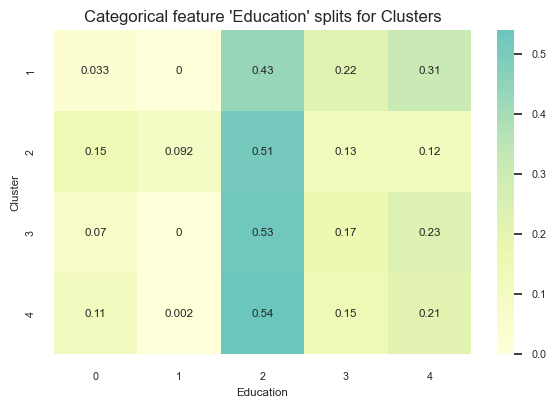

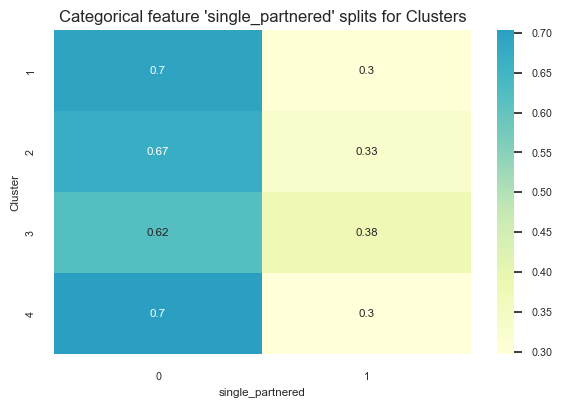

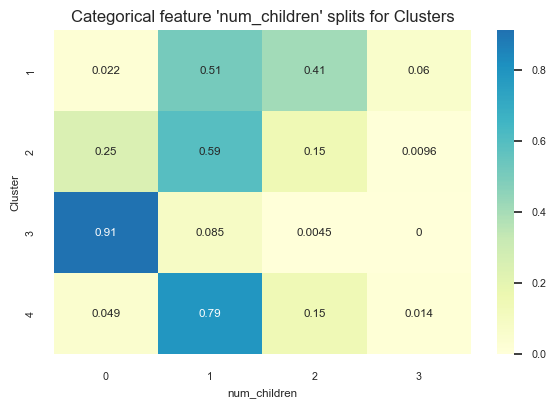

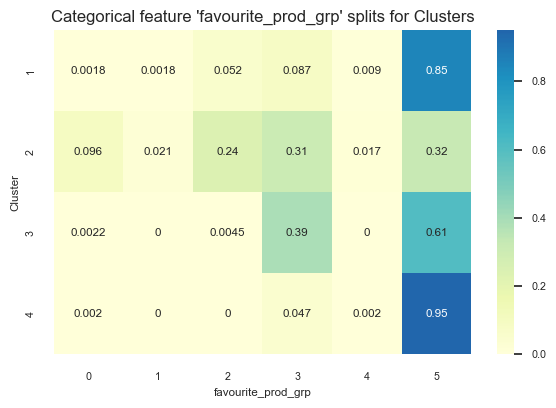

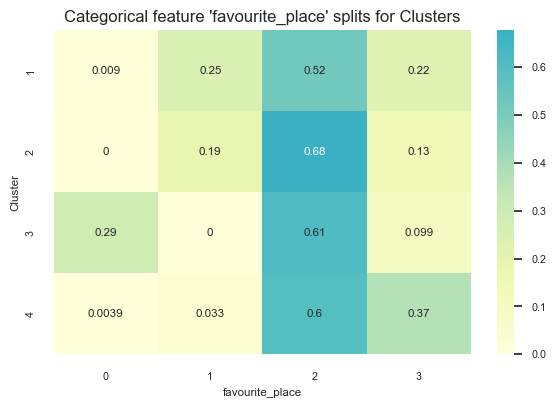

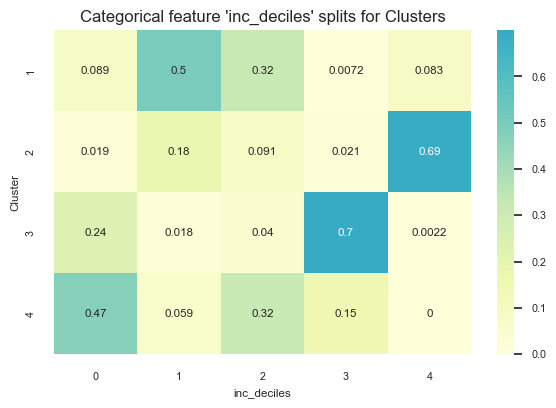

In [90]:
categorical_cols = ['Education', 'single_partnered', 'num_children', 'favourite_prod_grp', 'favourite_place', 'inc_deciles']  

for col in categorical_cols :
    cluster_crosstab = pd.crosstab(numerical_df['Cluster'], numerical_df[col], normalize='index')  # Row-wise proportion

    plt.figure(figsize=(6, 4))
    sns.heatmap(cluster_crosstab, annot=True, cmap='YlGnBu', cbar=True, center=0.65)
    Title = "Categorical feature '" + col + "' splits for Clusters"
    plt.title(Title, fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Cluster')
    # Adjust Y-axis tick labels
    y_ticks = plt.gca().get_yticks()
    plt.gca().set_yticklabels([int(y) + 1 for y in y_ticks])
    
    plt.show()

In [91]:
#Spending on Product Groups for each Cluster

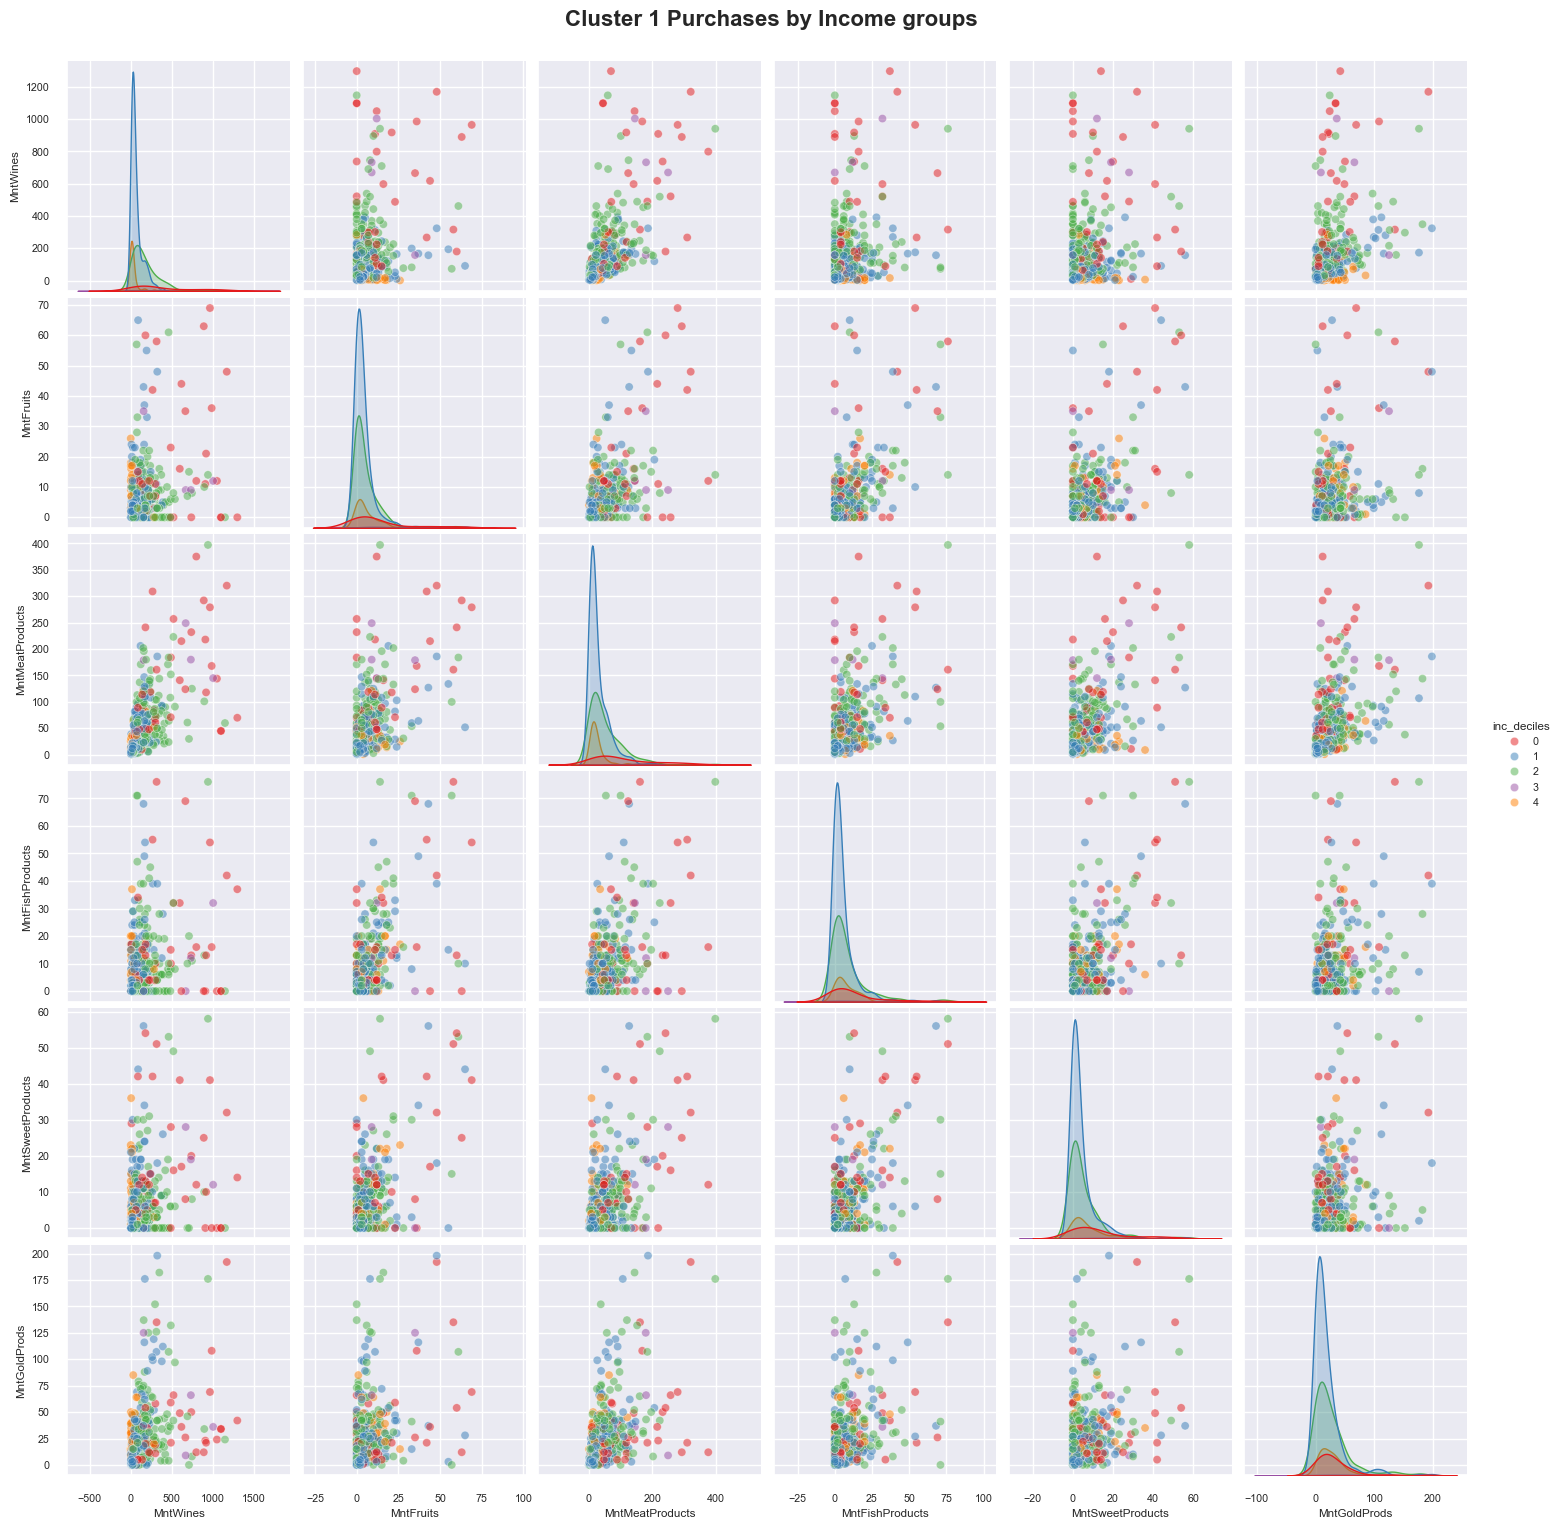

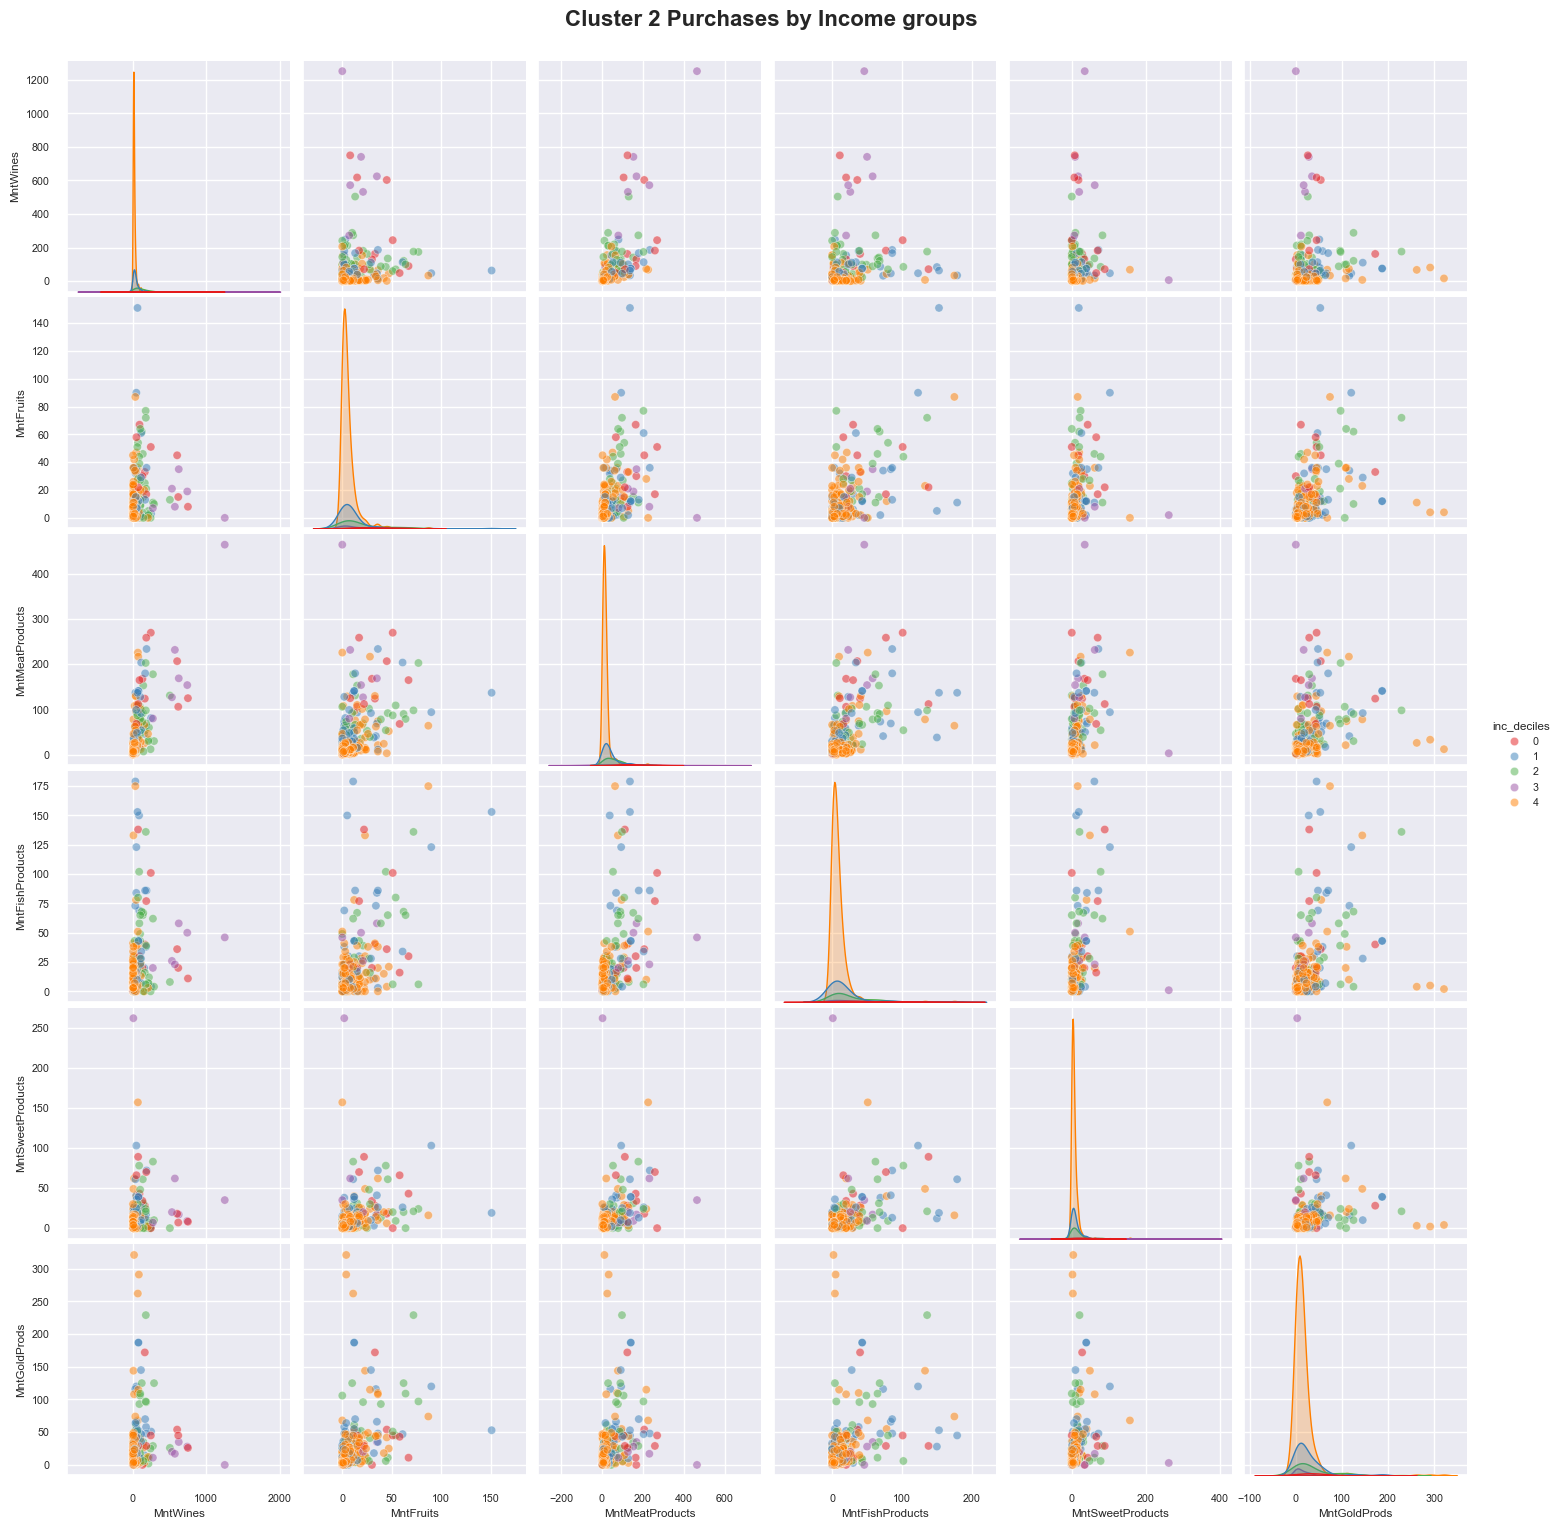

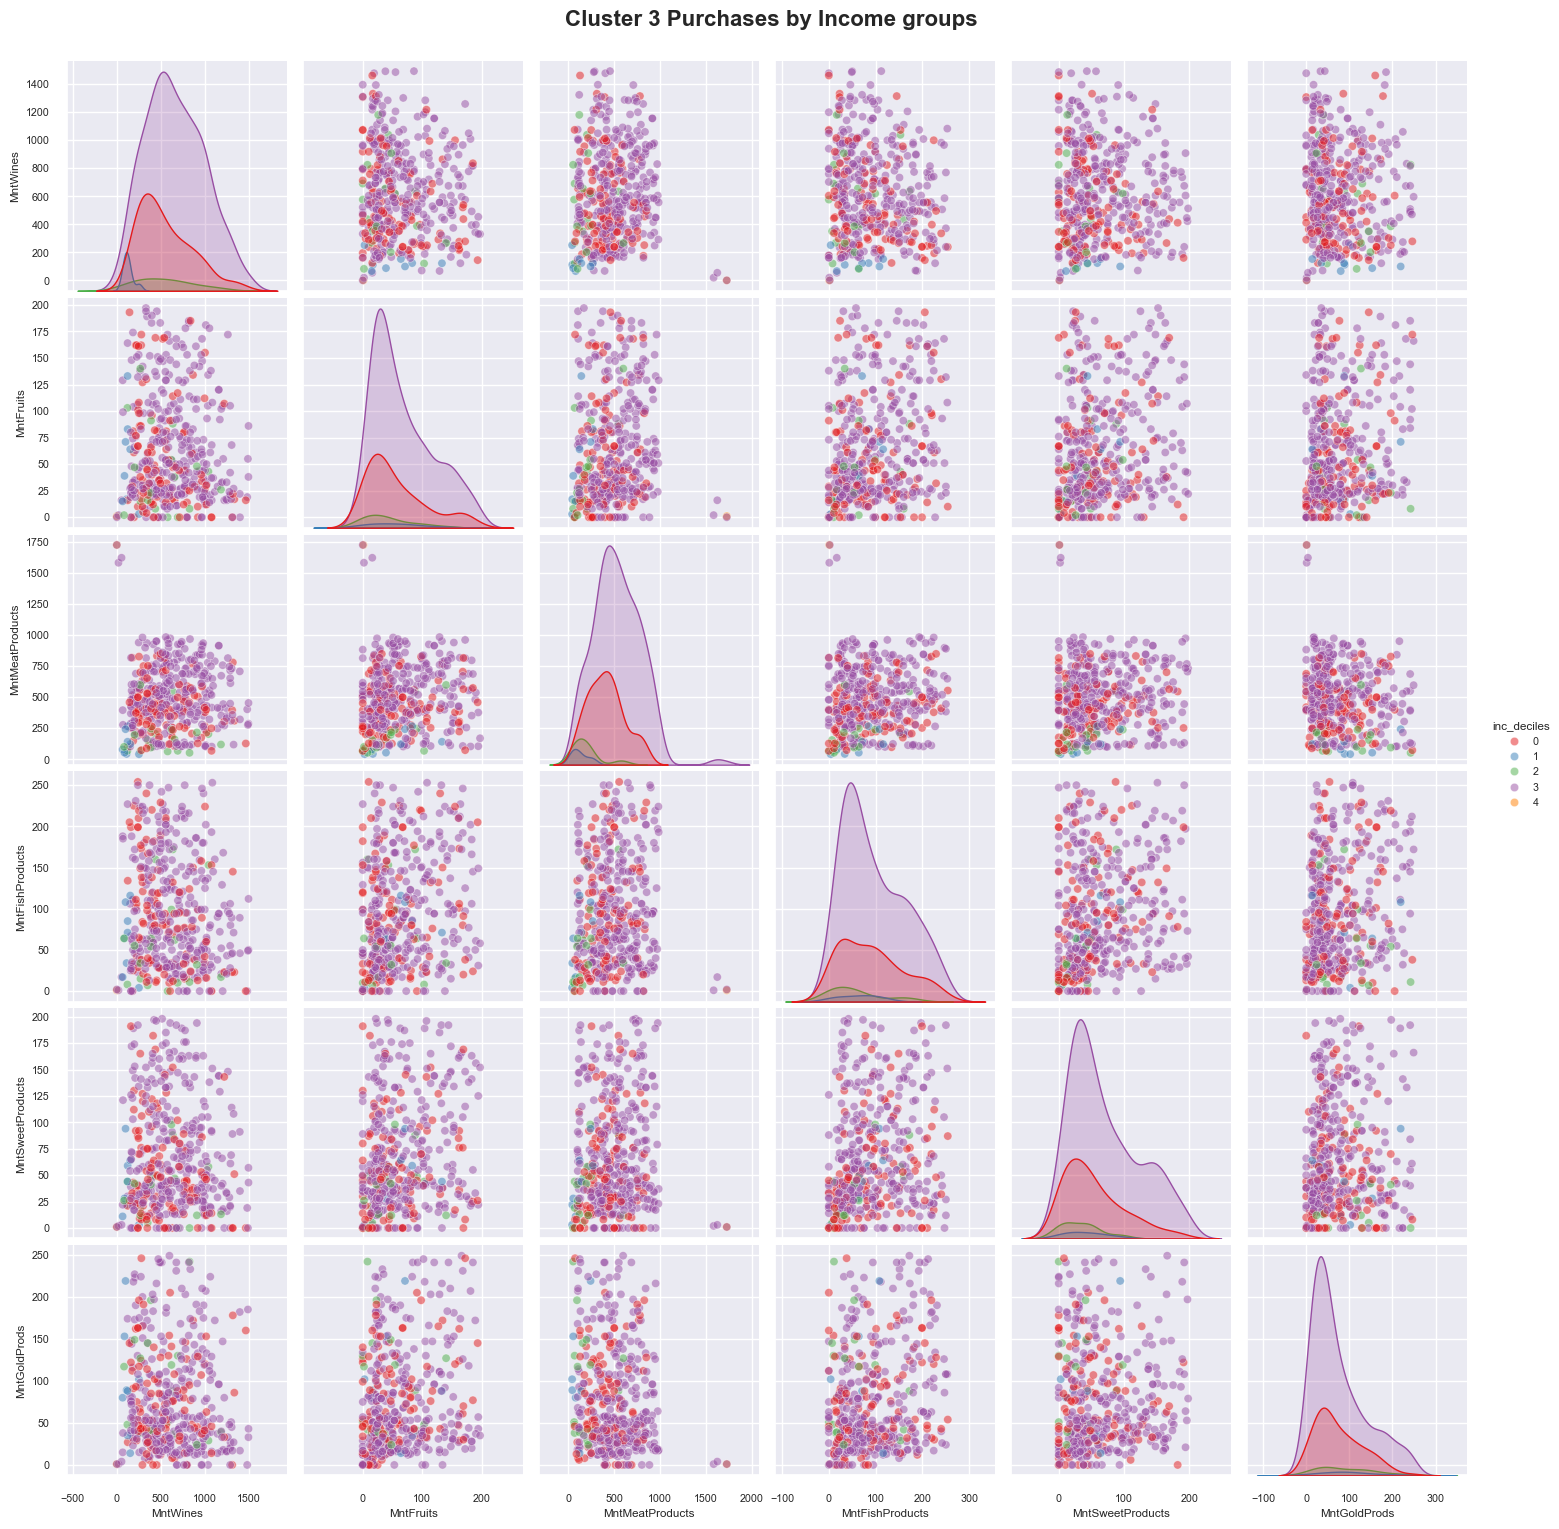

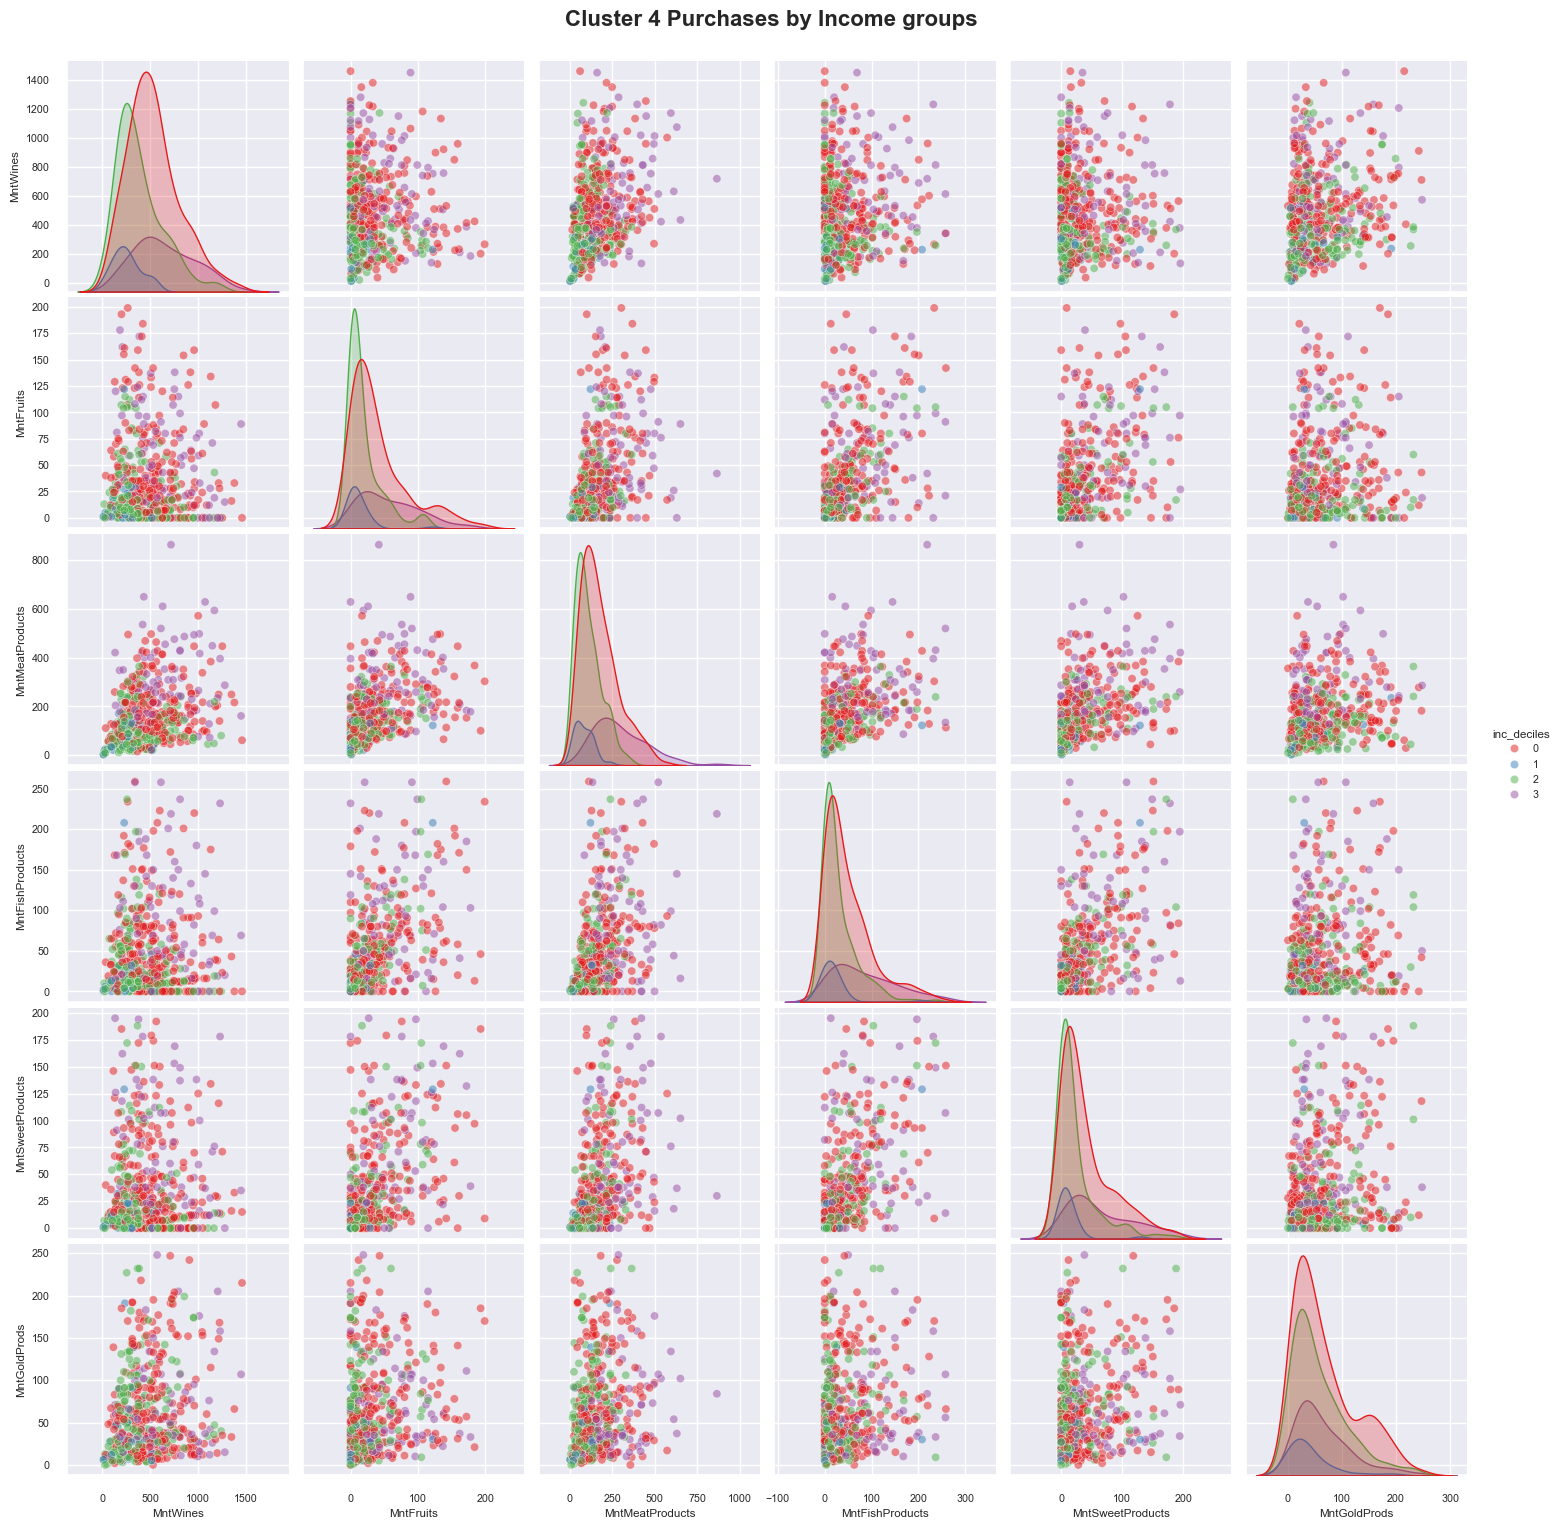

In [92]:
# Behavioral view for: Spending on Products by Places

# Define the variables for pair plotting
variables = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Loop through clusters and create pairplots
for cluster_id in range(4):
    cluster_data = numerical_df[numerical_df['Cluster'] == cluster_id]
    
    sns.pairplot(cluster_data, vars=variables, hue='inc_deciles', palette='Set1', plot_kws={'alpha': 0.5})
    
    plt.suptitle(f'Cluster {cluster_id+1} Purchases by Income groups', y=1.02, fontsize=16, fontweight='bold')
    plt.show()